In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans    

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6) 

In [4]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)  

In [5]:
# Load data
df = pd.read_csv('Top500Cleaned.csv')
df.columns = df.columns.str.strip()

# Helper: Composite Score (simple average of normalized ROE5Yr, QtrProfitVar, DivYld)
for col in ['ROE5Yr', 'QtrProfitVar', 'DivYld']:
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df['CompositeScore'] = df[['ROE5Yr_norm', 'QtrProfitVar_norm', 'DivYld_norm']].mean(axis=1) 
df

Name      CMP     PE      MarCap  DivYld     NPQtr  \
0    Reliance Industr  1456.40  28.30  1970868.77    0.34  22611.00   
1           HDFC Bank  1934.70  20.92  1481127.37    1.14  19284.57   
2                 TCS  3561.30  26.56  1288509.51    1.68  12293.00   
3       Bharti Airtel  1814.00  39.22  1087687.53    0.44  12475.80   
4          ICICI Bank  1454.00  20.31  1036571.84    0.69  14353.69   
..                ...      ...    ...         ...     ...       ...   
397      JM Financial   115.18  14.23    11009.40    2.34    235.02   
398   Relaxo Footwear   439.70  64.26    10945.83    0.68     56.22   
399   Marksans Pharma   241.40  29.75    10939.37    0.25    105.06   
400    Vesuvius India  5363.40  42.69    10887.70    0.27     59.31   
401   Engineers India   193.53  26.18    10877.21    1.55    108.73   

     QtrProfitVar   SalesQtr  QtrSalesVar   ROCE  ROE5Yr  ROE3Yr  ROE7Yr  \
0            2.41  261388.00        10.51   9.43    8.51    8.89    8.91   
1            6.88   86779.34         9.25   7.51   16.15   16.01   16.24   
2           -1.69   64479.00         5.29  64.63   46.84   50.30   43.96   
3          185.61   47876.20        27.33  15.36   16.96   19.35   13.72   
4           15.69   48386.92        13.57   7.88   16.81   18.02   14.82   
..            ...        ...          ...    ...     ...     ...     ...   
397        782.36    1003.92       -20.37   9.39    7.18    5.67    7.96   
398         -8.42     695.15        -6.97  11.09   11.82    9.14   13.19   
399         26.02     681.85        16.33  20.61   19.40   17.27   18.27   
400        -13.77     482.22         6.37  25.47   13.95   17.38   13.53   
401         71.63     764.59       -11.88  22.21   16.42   16.01   16.03   

     ROE5Yr_norm  QtrProfitVar_norm  DivYld_norm  CompositeScore  
0       0.242928           0.009251     0.034483        0.095554  
1       0.301182           0.009524     0.115619        0.142108  
2       0.535189           0.009000     0.170385        0.238191  
3       0.307358           0.020449     0.044625        0.124144  
4       0.306214           0.010062     0.069980        0.128752  
..           ...                ...          ...             ...  
397     0.232787           0.056927     0.237323        0.175679  
398     0.268166           0.008588     0.068966        0.115240  
399     0.325963           0.010694     0.025355        0.120670  
400     0.284407           0.008261     0.027383        0.106684  
401     0.303241           0.013482     0.157201        0.157974  

[402 rows x 17 columns]

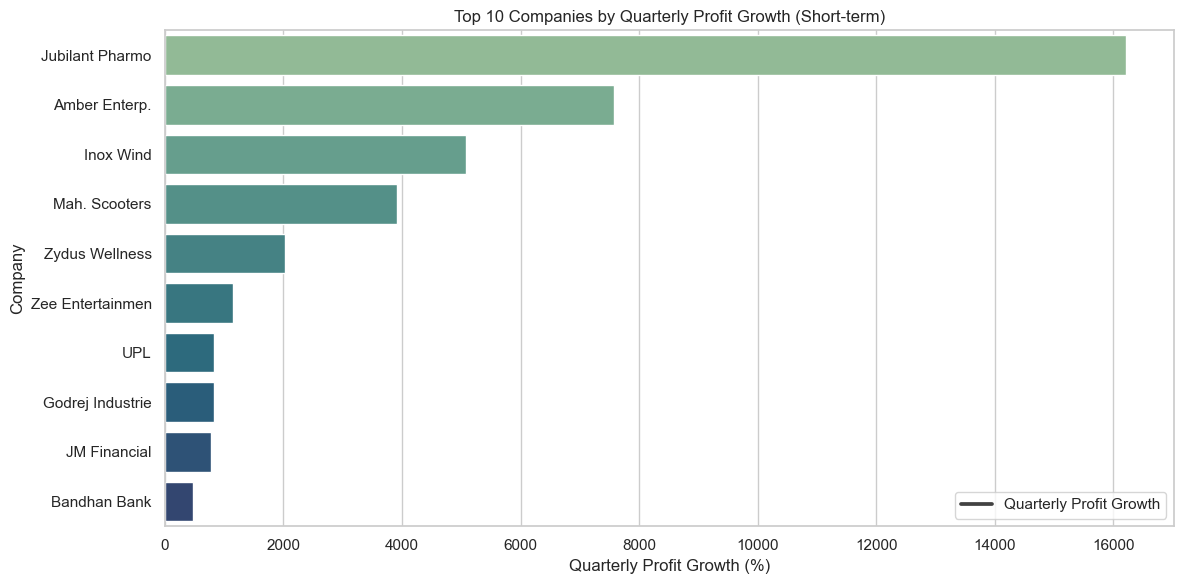

In [5]:
# 1. Top 10 Companies by Recent Quarterly Profit Growth (Short-term)
top10_short = df.nlargest(10, 'QtrProfitVar')
plt.figure(figsize=(12,6))
sns.barplot(x='QtrProfitVar', y='Name', data=top10_short, palette='crest')
plt.title('Top 10 Companies by Quarterly Profit Growth (Short-term)')
plt.xlabel('Quarterly Profit Growth (%)')
plt.ylabel('Company')
plt.legend(['Quarterly Profit Growth'])
plt.tight_layout()
plt.show()  

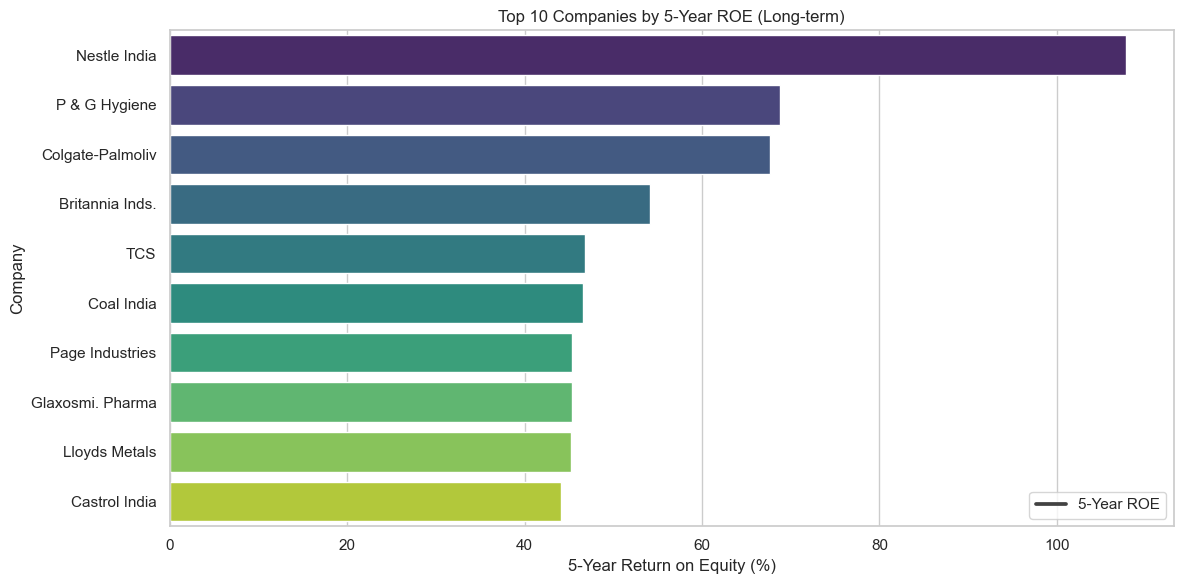

In [6]:
# 2. Top 10 Companies by 5-Year ROE (Long-term)
top10_long = df.nlargest(10, 'ROE5Yr')
plt.figure(figsize=(12,6))
sns.barplot(x='ROE5Yr', y='Name', data=top10_long, palette='viridis')
plt.title('Top 10 Companies by 5-Year ROE (Long-term)')
plt.xlabel('5-Year Return on Equity (%)')
plt.ylabel('Company')
plt.legend(['5-Year ROE'])
plt.tight_layout()
plt.show() 

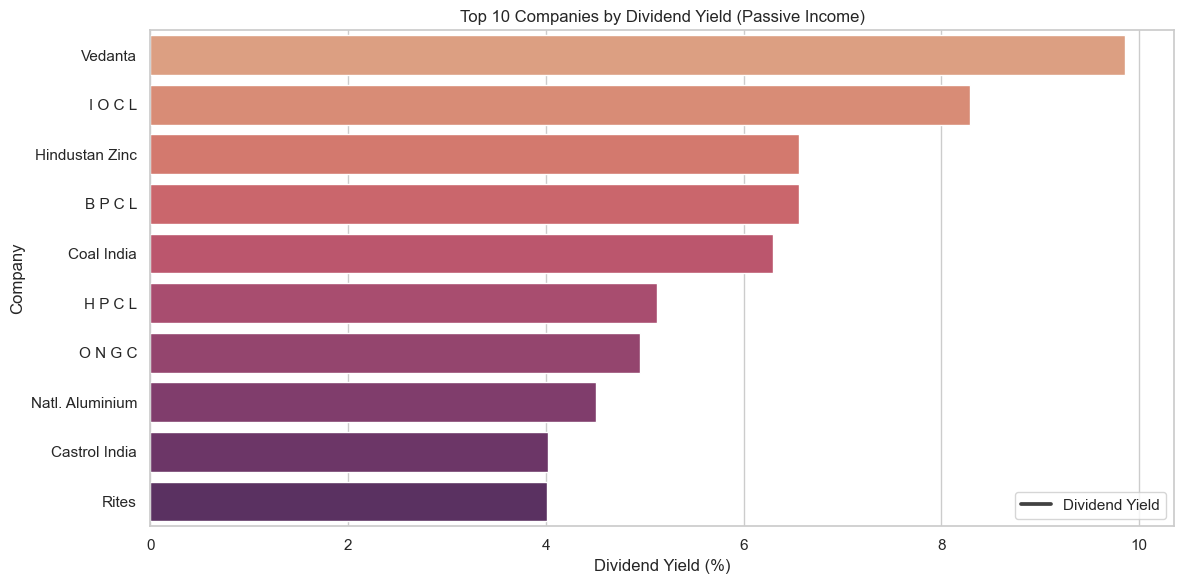

In [7]:
# 3. Top 10 Companies by Dividend Yield (Passive Income)
top10_div = df.nlargest(10, 'DivYld')
plt.figure(figsize=(12,6))
sns.barplot(x='DivYld', y='Name', data=top10_div, palette='flare')
plt.title('Top 10 Companies by Dividend Yield (Passive Income)')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('Company')
plt.legend(['Dividend Yield'])
plt.tight_layout()
plt.show() 

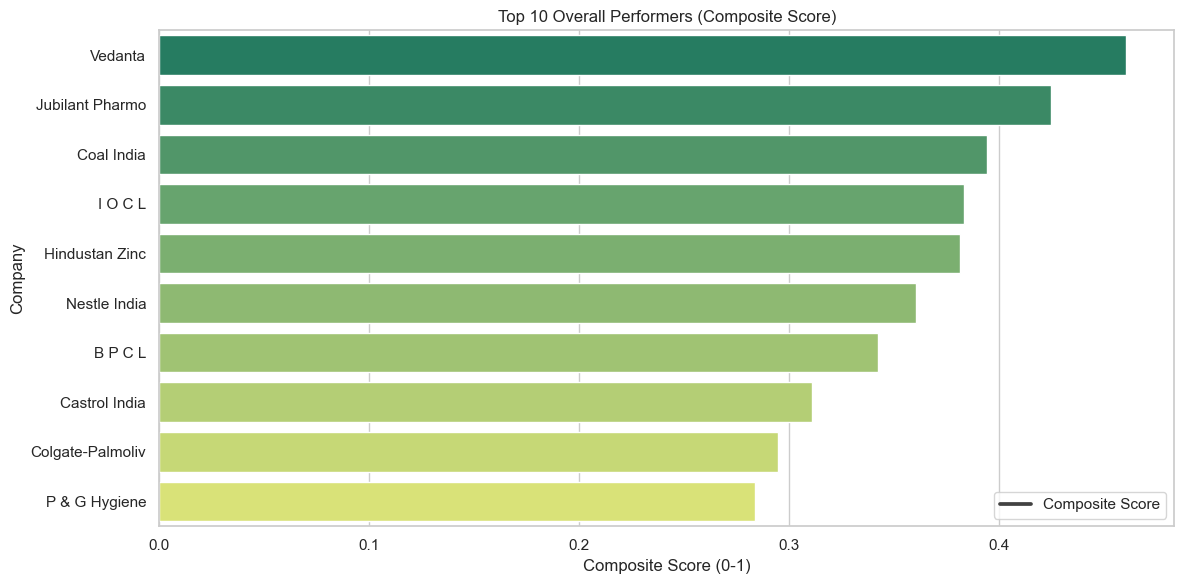

In [8]:
# 4. Top 10 Overall Performers (Composite Score)
top10_perf = df.nlargest(10, 'CompositeScore')
plt.figure(figsize=(12,6))
sns.barplot(x='CompositeScore', y='Name', data=top10_perf, palette='summer')
plt.title('Top 10 Overall Performers (Composite Score)')
plt.xlabel('Composite Score (0-1)')
plt.ylabel('Company')
plt.legend(['Composite Score'])
plt.tight_layout()
plt.show() 

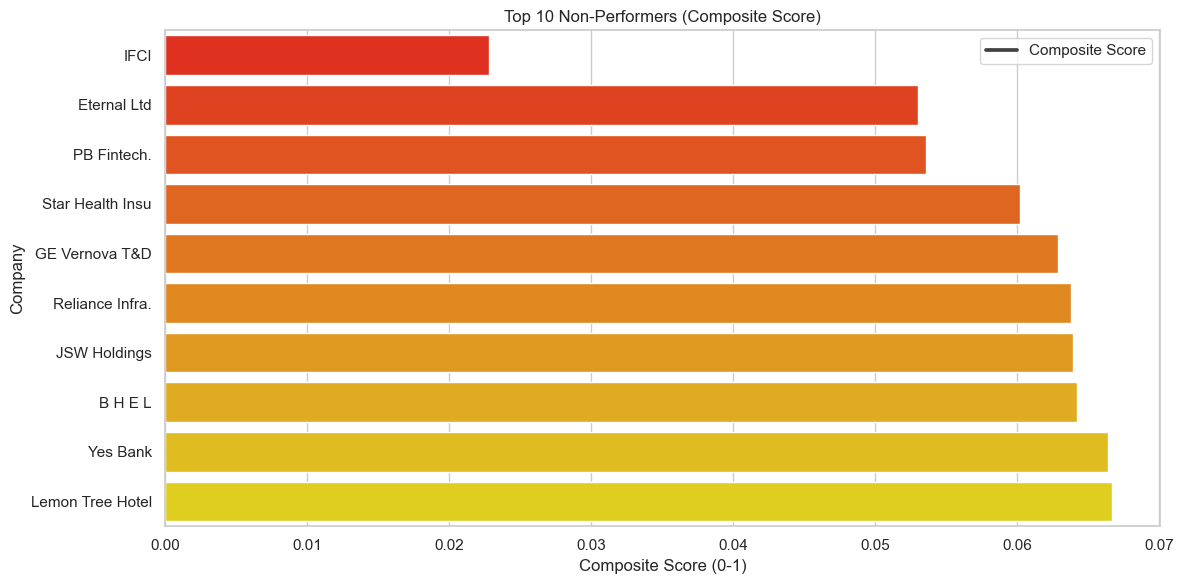

In [9]:
# 5. Top 10 Non-Performers (Lowest Composite Score)
bottom10_perf = df.nsmallest(10, 'CompositeScore')
plt.figure(figsize=(12,6))
sns.barplot(x='CompositeScore', y='Name', data=bottom10_perf, palette='autumn')
plt.title('Top 10 Non-Performers (Composite Score)')
plt.xlabel('Composite Score (0-1)')
plt.ylabel('Company')
plt.legend(['Composite Score'])
plt.tight_layout()
plt.show() 

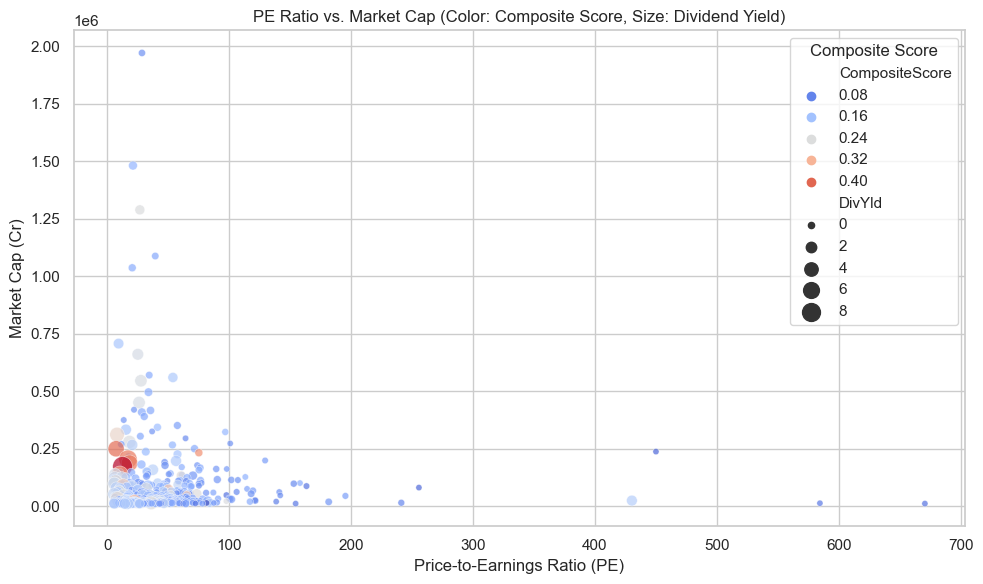

In [8]:
# 6. PE Ratio vs. Market Cap (Value vs. Growth)
plt.figure(figsize=(10,6))
sns.scatterplot(x='PE', y='MarCap', data=df, hue='CompositeScore', palette='coolwarm', size='DivYld', sizes=(20, 200), alpha=0.7)
plt.title('PE Ratio vs. Market Cap (Color: Composite Score, Size: Dividend Yield)')
plt.xlabel('Price-to-Earnings Ratio (PE)')
plt.ylabel('Market Cap (Cr)')
plt.legend(title='Composite Score')
plt.tight_layout()
plt.show()

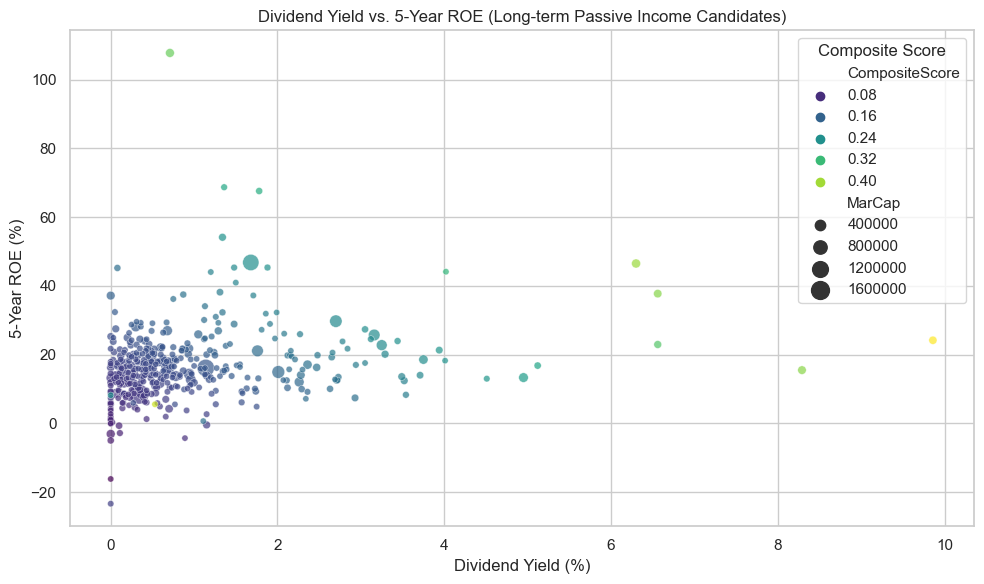

In [11]:
# 7. Dividend Yield vs. ROE (Long-term Passive Income Candidates)
plt.figure(figsize=(10,6))
sns.scatterplot(x='DivYld', y='ROE5Yr', data=df, hue='CompositeScore', palette='viridis', size='MarCap', sizes=(20, 200), alpha=0.7)
plt.title('Dividend Yield vs. 5-Year ROE (Long-term Passive Income Candidates)')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('5-Year ROE (%)')
plt.legend(title='Composite Score')
plt.tight_layout()
plt.show() 

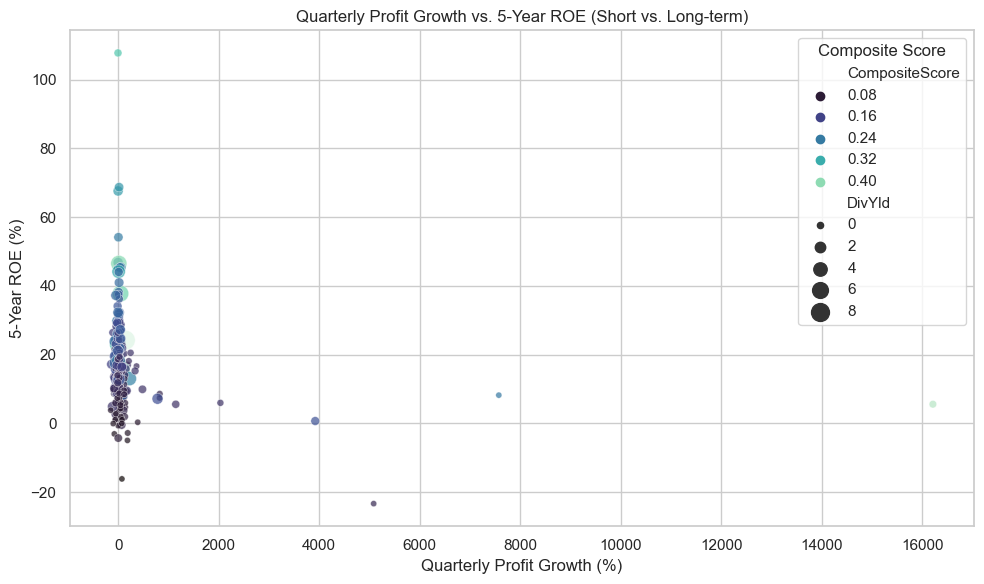

In [12]:
# 8. Quarterly Profit Growth vs. 5-Year ROE (Short vs. Long-term)
plt.figure(figsize=(10,6))
sns.scatterplot(x='QtrProfitVar', y='ROE5Yr', data=df, hue='CompositeScore', palette='mako', size='DivYld', sizes=(20, 200), alpha=0.7)
plt.title('Quarterly Profit Growth vs. 5-Year ROE (Short vs. Long-term)')
plt.xlabel('Quarterly Profit Growth (%)')
plt.ylabel('5-Year ROE (%)')
plt.legend(title='Composite Score')
plt.tight_layout()
plt.show() 

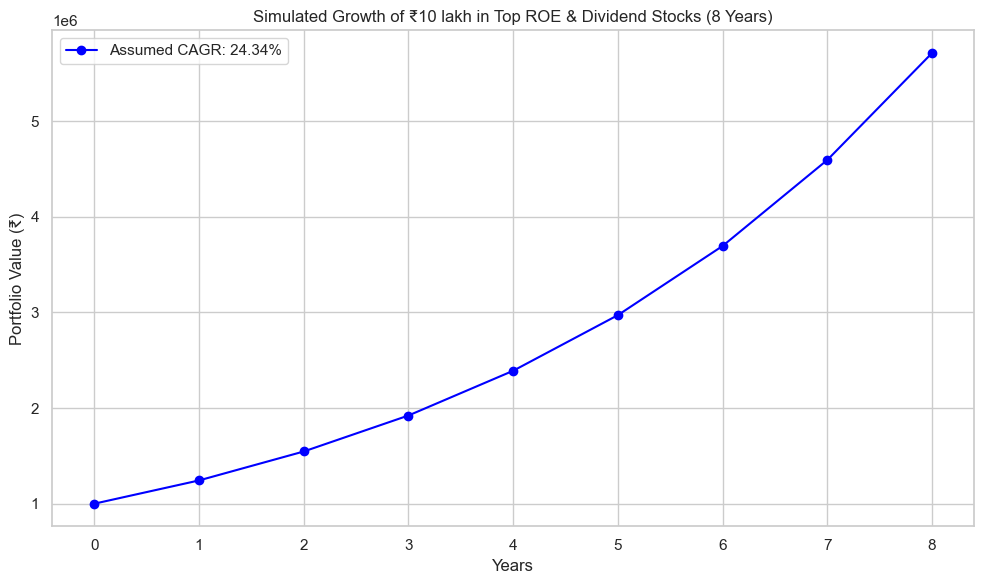

In [13]:
# 10. Investment Strategy Simulation: Growth of ₹10 lakh over 8 years in Top ROE & Dividend Stocks
# Assume CAGR = avg(ROE5Yr, DivYld) for top 10 composite score stocks
top10_strategy = df.nlargest(10, 'CompositeScore')
avg_cagr = (top10_strategy['ROE5Yr'].mean() + top10_strategy['DivYld'].mean()) / 100 / 2
years = np.arange(0,9)
initial = 10_00_000
values = initial * (1 + avg_cagr) ** years
plt.figure(figsize=(10,6))
plt.plot(years, values, marker='o', color='blue')
plt.title('Simulated Growth of ₹10 lakh in Top ROE & Dividend Stocks (8 Years)')
plt.xlabel('Years')
plt.ylabel('Portfolio Value (₹)')
plt.legend([f'Assumed CAGR: {avg_cagr*100:.2f}%'])
plt.grid(True)
plt.tight_layout() 
plt.show() 

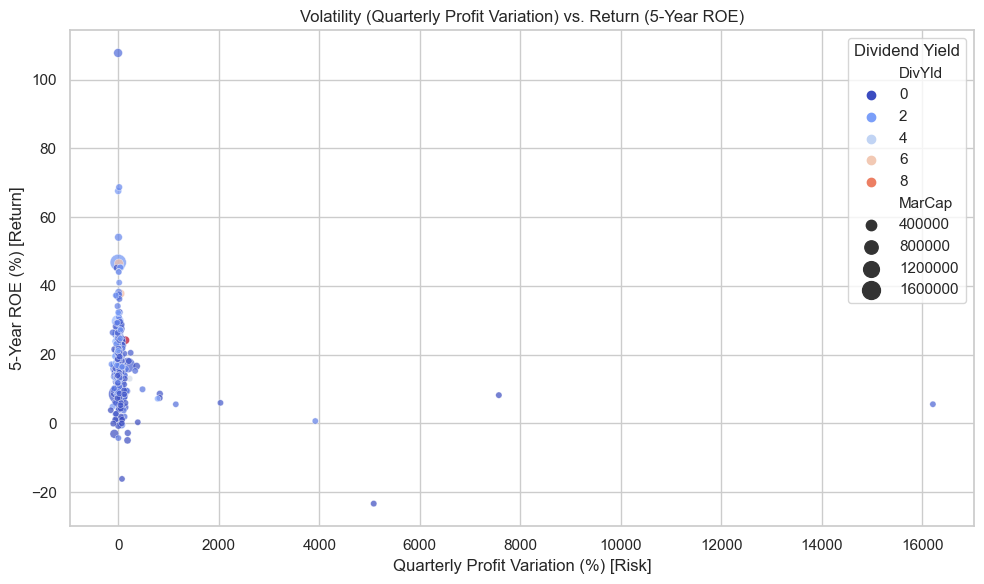

In [14]:
# 1. Volatility vs. Return (Assume 'QtrProfitVar' as proxy for volatility, 'ROE5Yr' for return)
plt.figure(figsize=(10,6))
sns.scatterplot(x='QtrProfitVar', y='ROE5Yr', data=df, hue='DivYld', palette='coolwarm', size='MarCap', sizes=(20,200), alpha=0.7)
plt.title('Volatility (Quarterly Profit Variation) vs. Return (5-Year ROE)')
plt.xlabel('Quarterly Profit Variation (%) [Risk]')
plt.ylabel('5-Year ROE (%) [Return]')
plt.legend(title='Dividend Yield')
plt.tight_layout()
plt.show() 

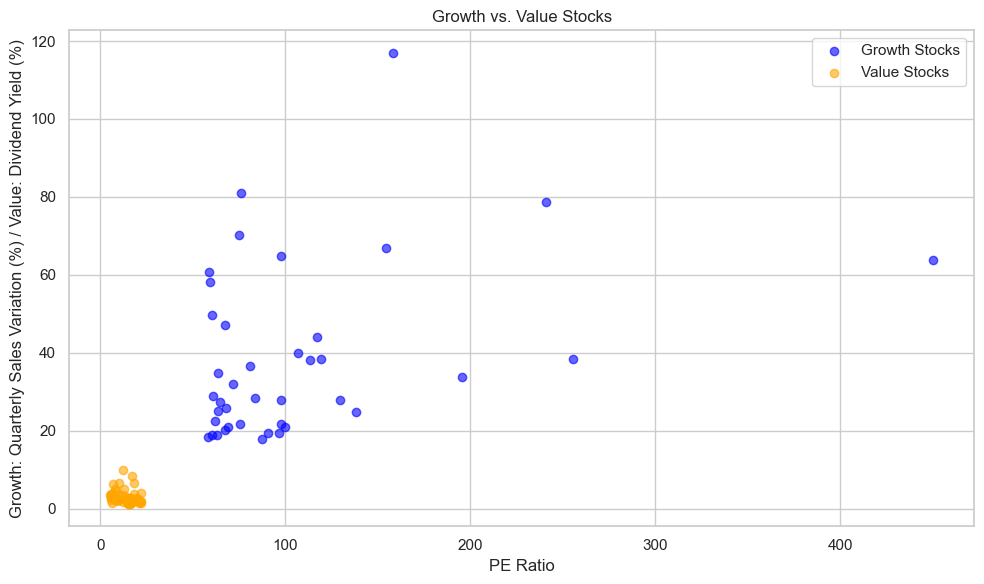

In [17]:
# 2. Growth vs. Value Stocks
# Define growth stocks: High QtrSalesVar, High PE; Value stocks: Low PE, High DivYld
growth = df[(df['QtrSalesVar'] > df['QtrSalesVar'].quantile(0.75)) & (df['PE'] > df['PE'].quantile(0.75))]
value = df[(df['PE'] < df['PE'].quantile(0.25)) & (df['DivYld'] > df['DivYld'].quantile(0.75))]
plt.figure(figsize=(10,6))
plt.scatter(growth['PE'], growth['QtrSalesVar'], color='blue', label='Growth Stocks', alpha=0.6)
plt.scatter(value['PE'], value['DivYld'], color='orange', label='Value Stocks', alpha=0.6)
plt.title('Growth vs. Value Stocks')
plt.xlabel('PE Ratio')
plt.ylabel('Growth: Quarterly Sales Variation (%) / Value: Dividend Yield (%)')
plt.legend()
plt.tight_layout()
plt.show() 

In [63]:
# Radar chart setup
def make_radar(names, values, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=names)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title(title, size=16, y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show() 


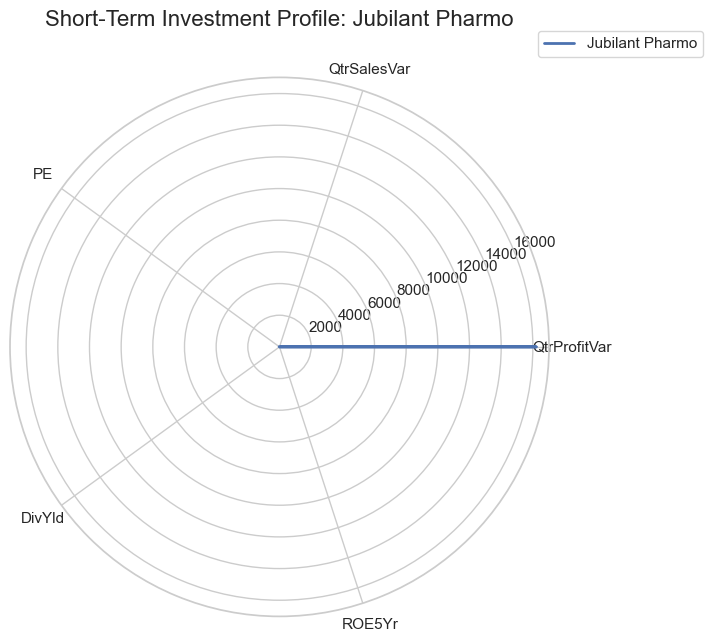

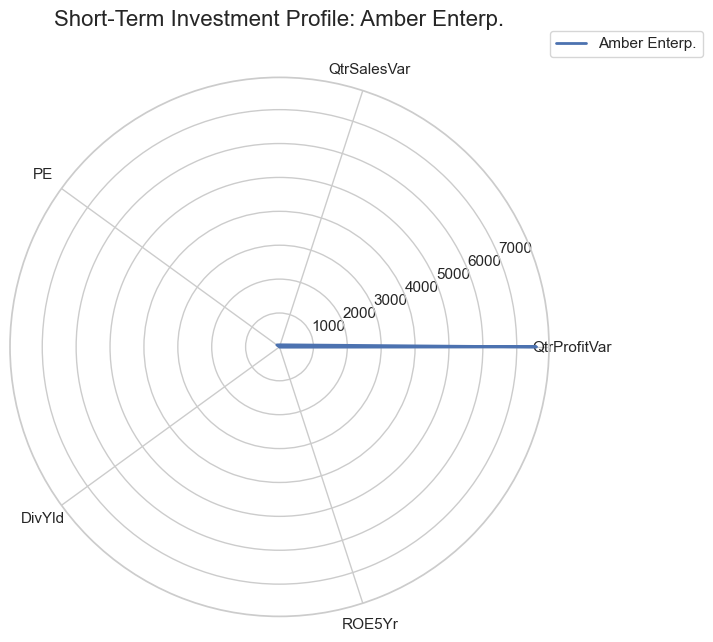

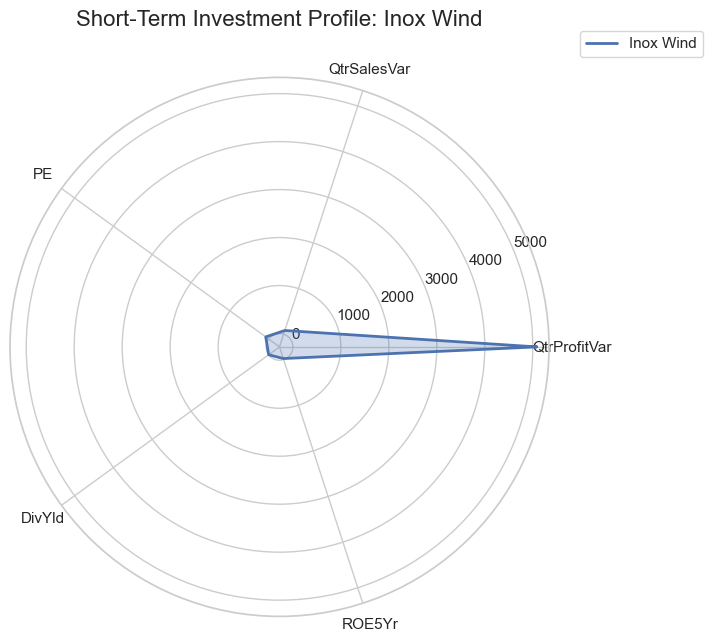

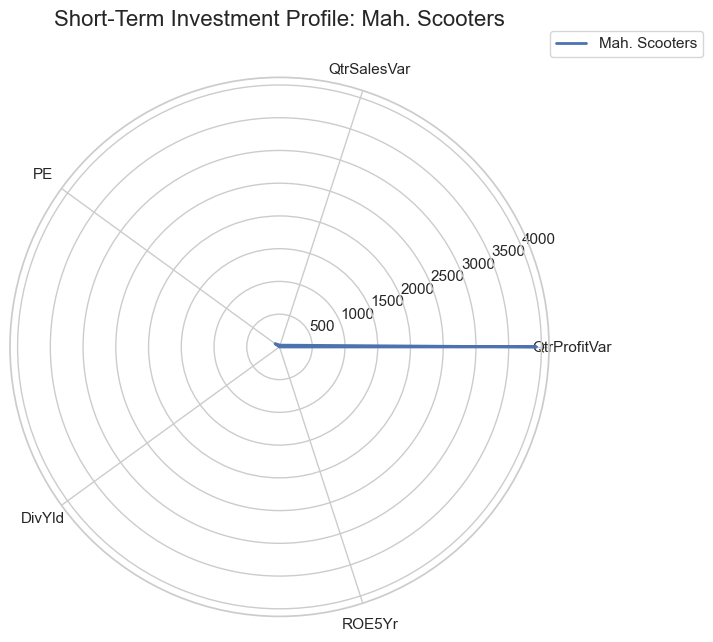

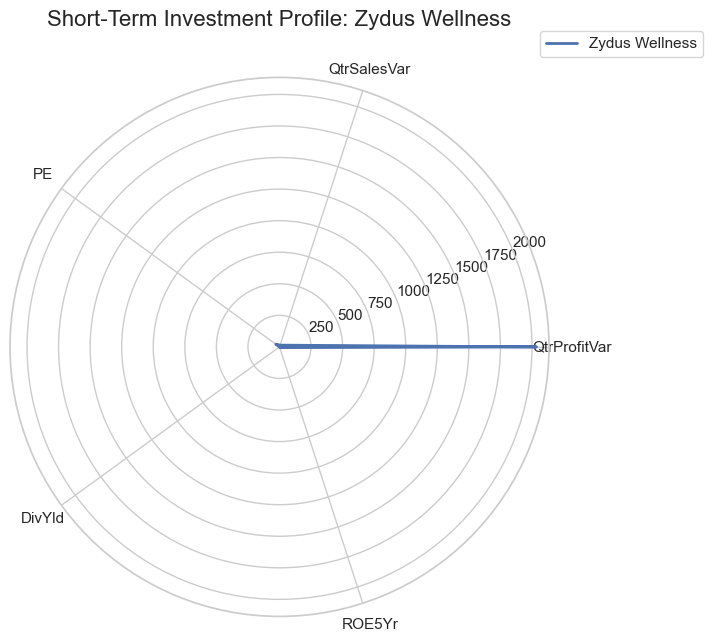

In [16]:
top5_short = df.nlargest(5, 'QtrProfitVar')
categories = ['QtrProfitVar', 'QtrSalesVar', 'PE', 'DivYld', 'ROE5Yr']
for idx, row in top5_short.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Short-Term Investment Profile: {row['Name']}")

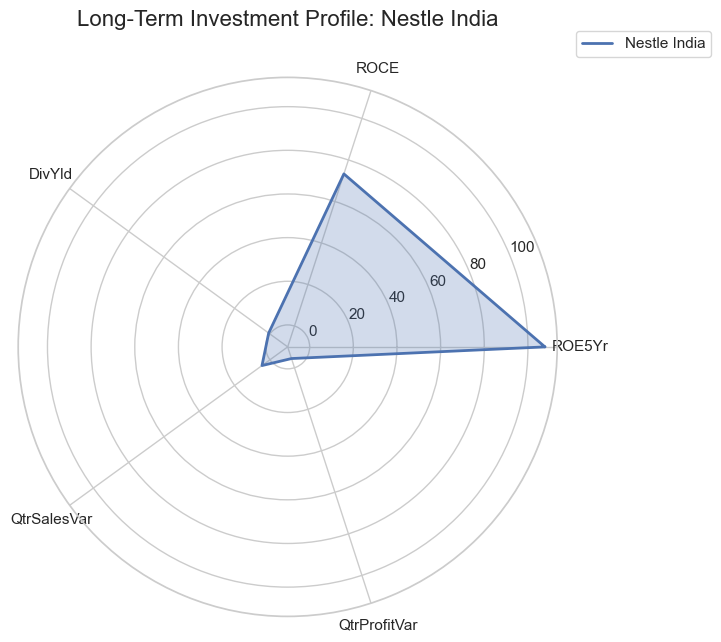

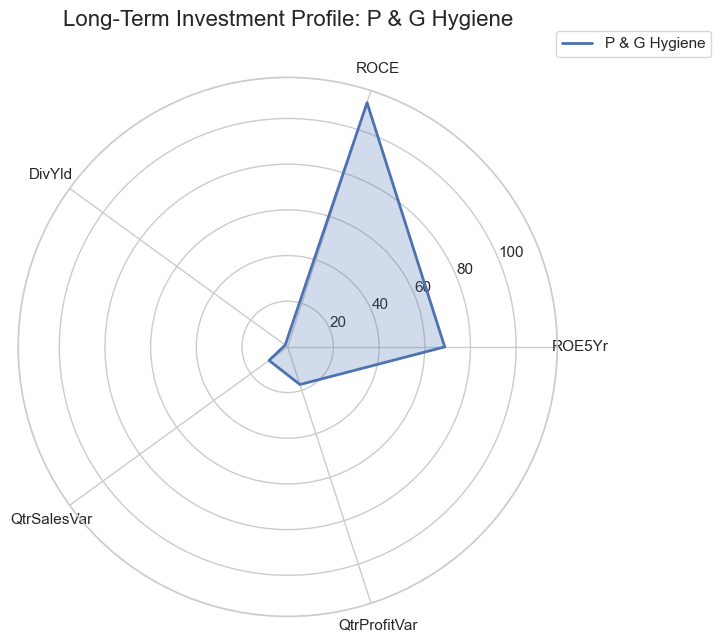

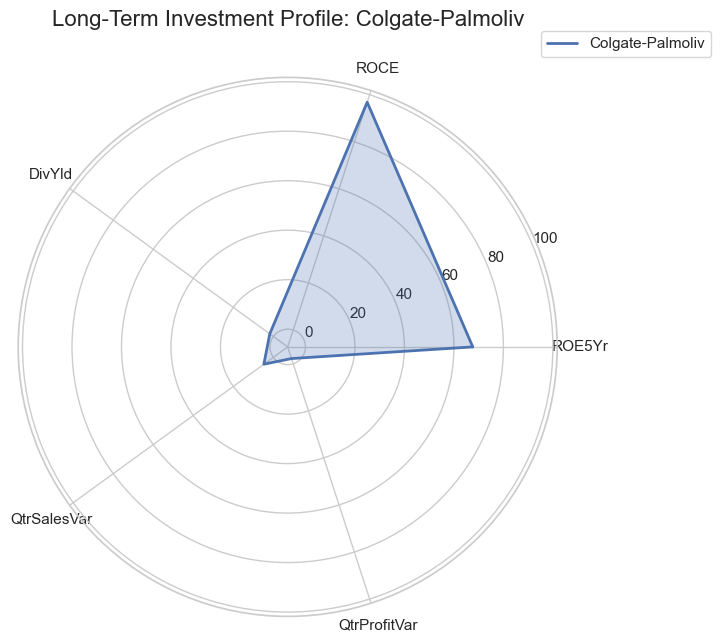

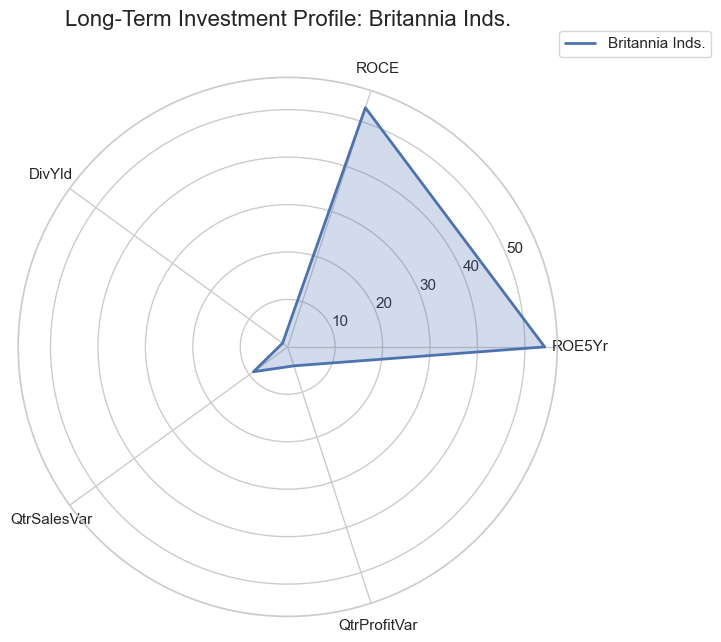

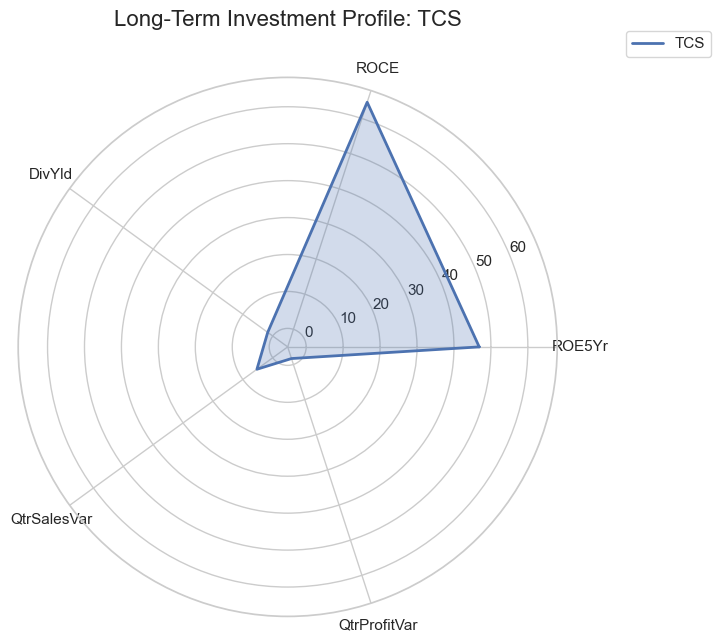

In [17]:
 #Select top 5 by 5-Year ROE
top5_long = df.nlargest(5, 'ROE5Yr')
categories = ['ROE5Yr', 'ROCE', 'DivYld', 'QtrSalesVar', 'QtrProfitVar']
for idx, row in top5_long.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Long-Term Investment Profile: {row['Name']}") 

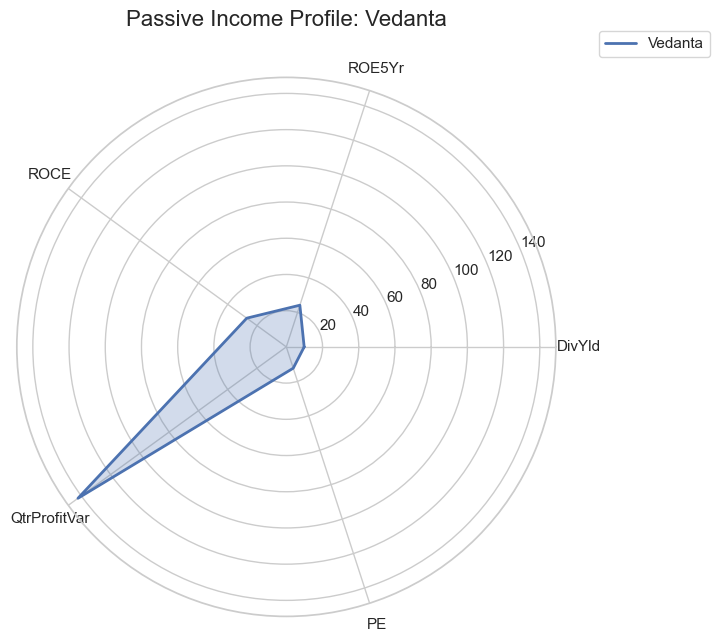

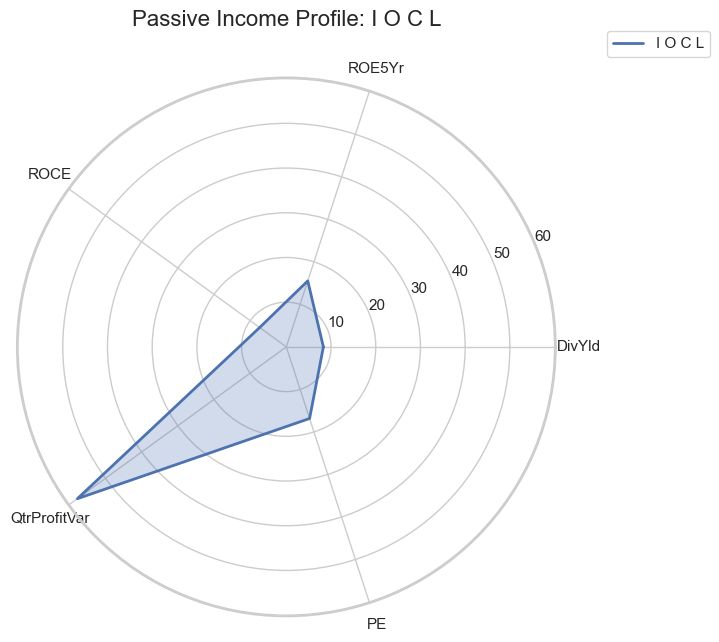

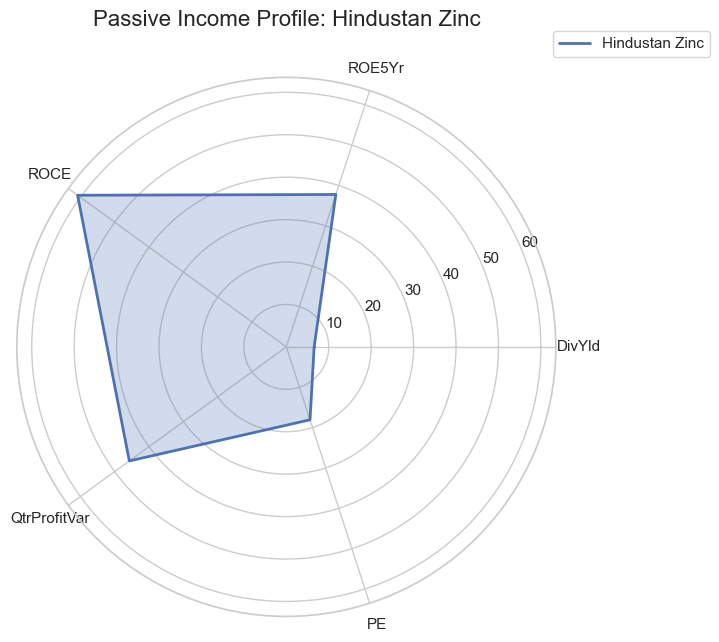

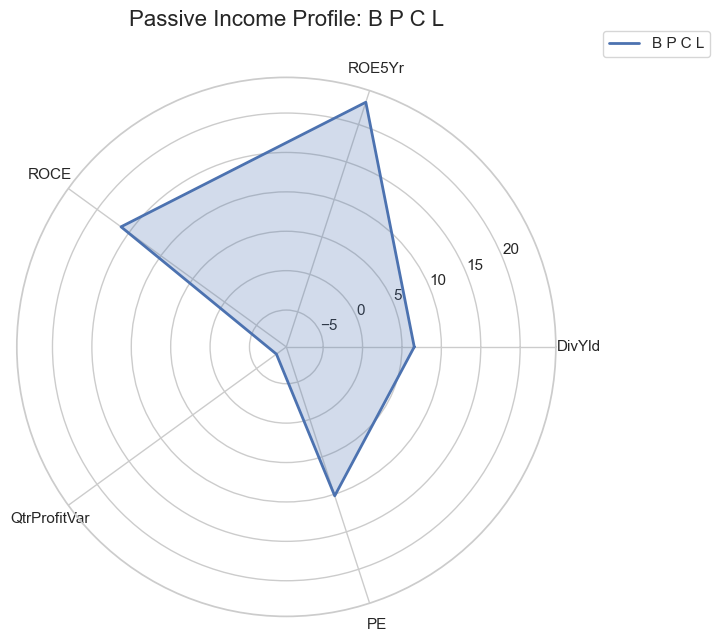

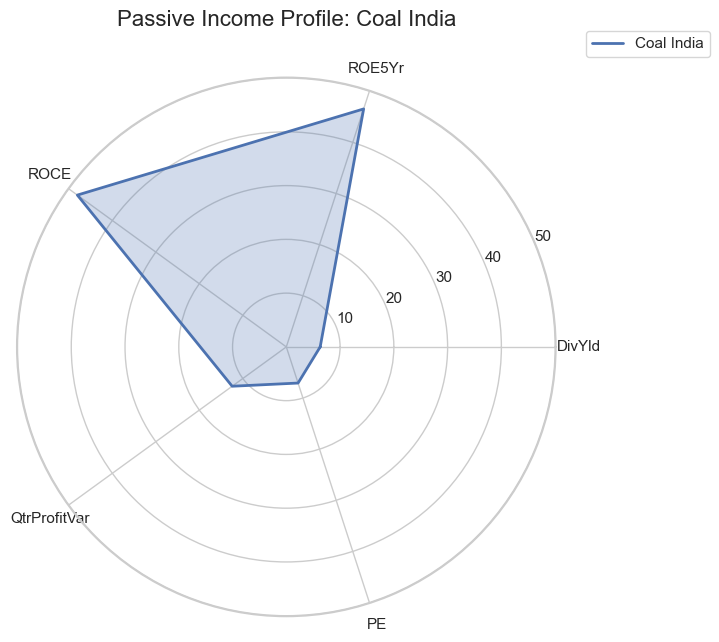

In [18]:
# Select top 5 by Dividend Yield
top5_div = df.nlargest(5, 'DivYld')
categories = ['DivYld', 'ROE5Yr', 'ROCE', 'QtrProfitVar', 'PE']
for idx, row in top5_div.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Passive Income Profile: {row['Name']}") 

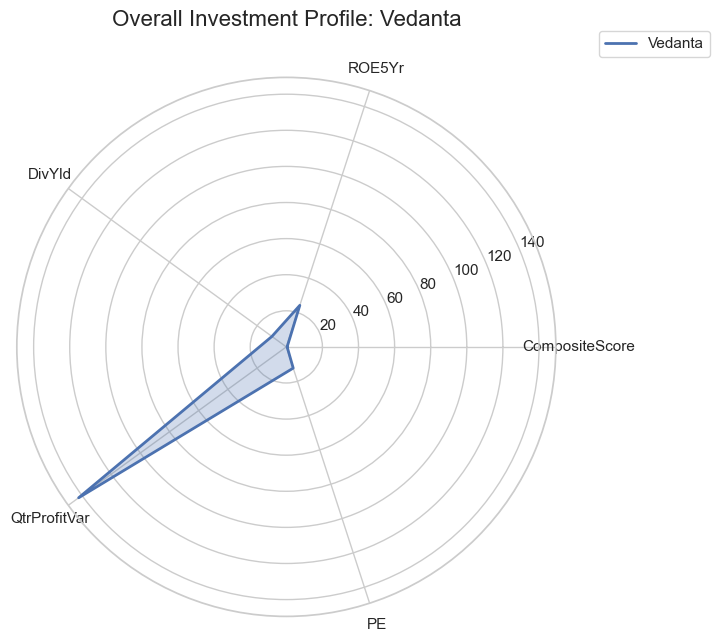

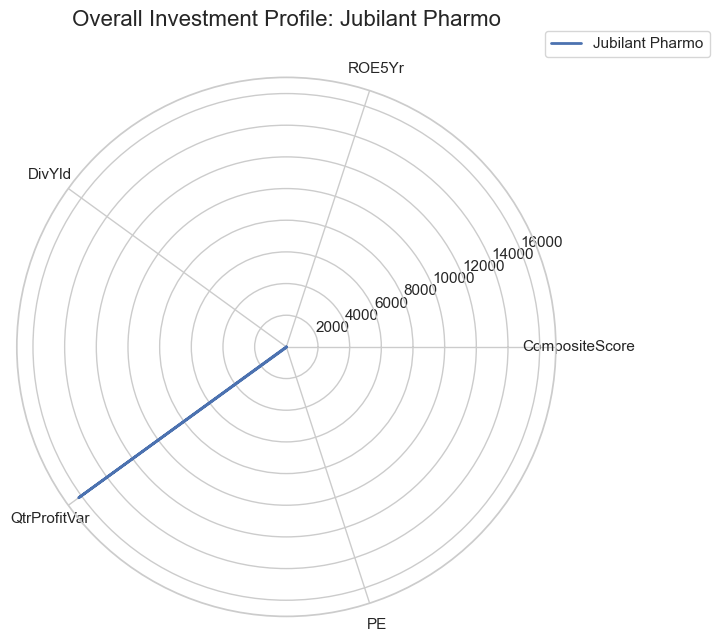

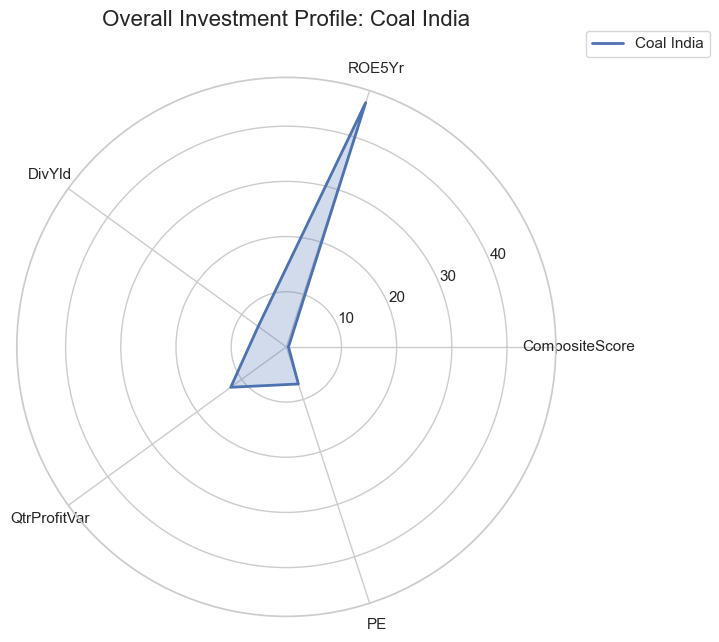

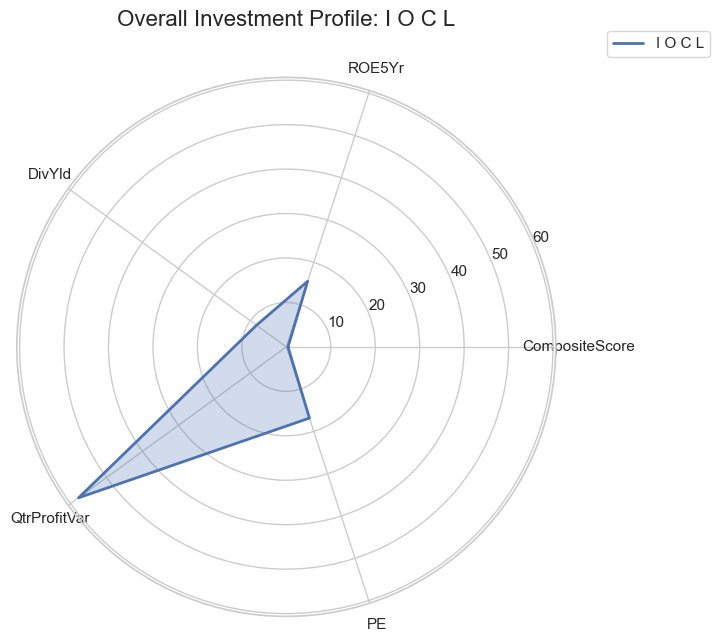

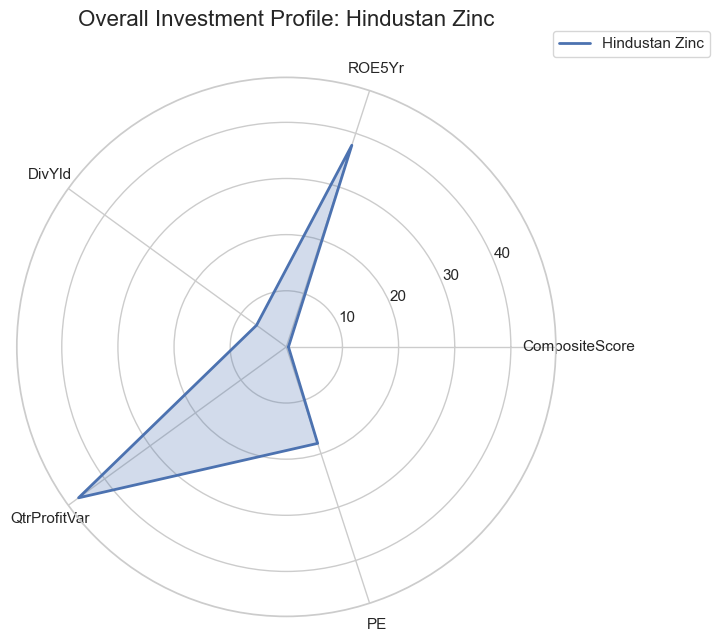

In [19]:
# Already computed 'CompositeScore' in previous steps
top5_comp = df.nlargest(5, 'CompositeScore')
categories = ['CompositeScore', 'ROE5Yr', 'DivYld', 'QtrProfitVar', 'PE']
for idx, row in top5_comp.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Overall Investment Profile: {row['Name']}") 

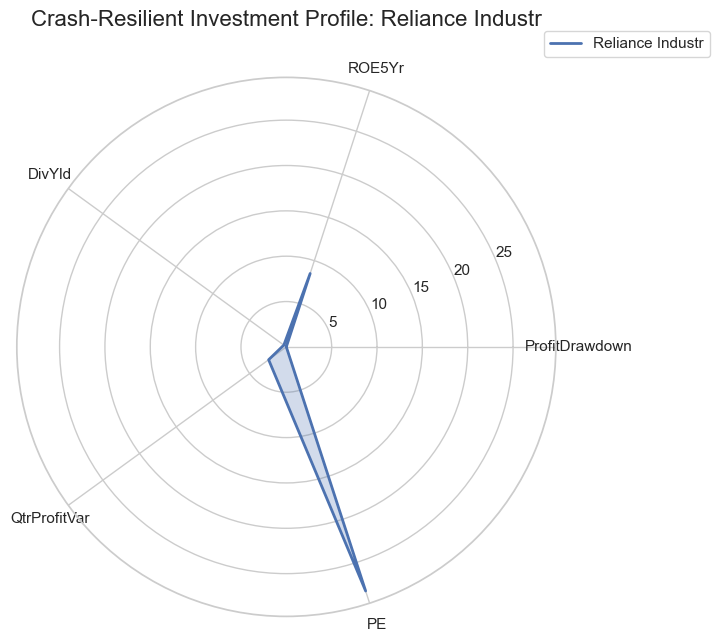

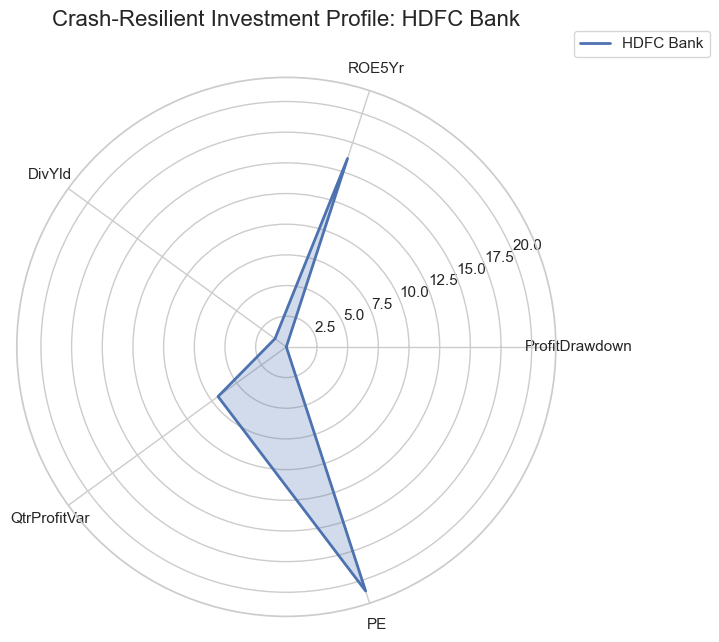

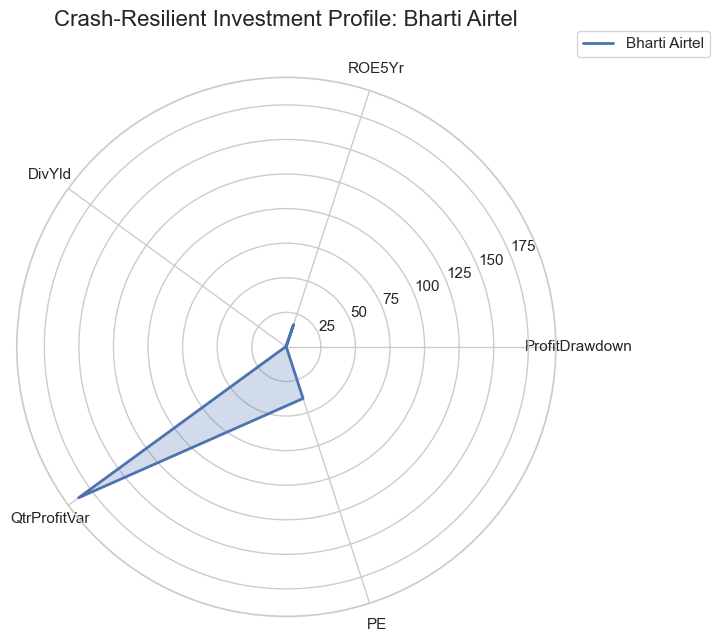

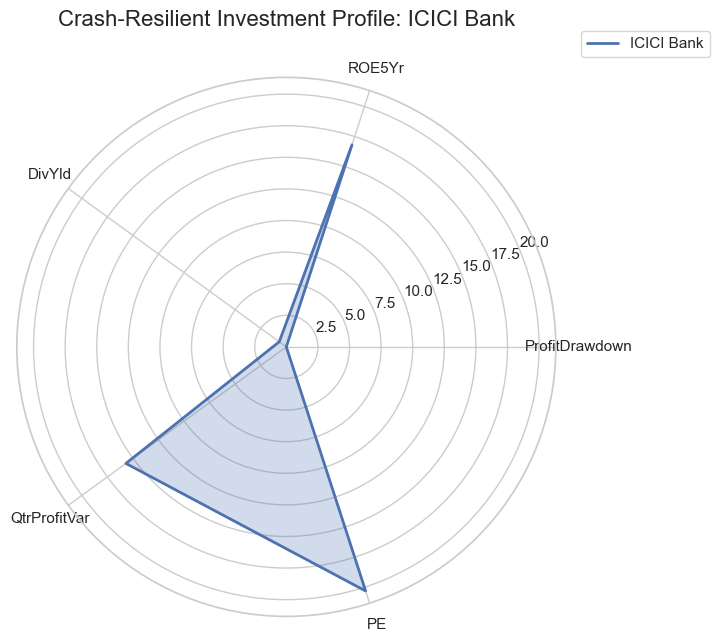

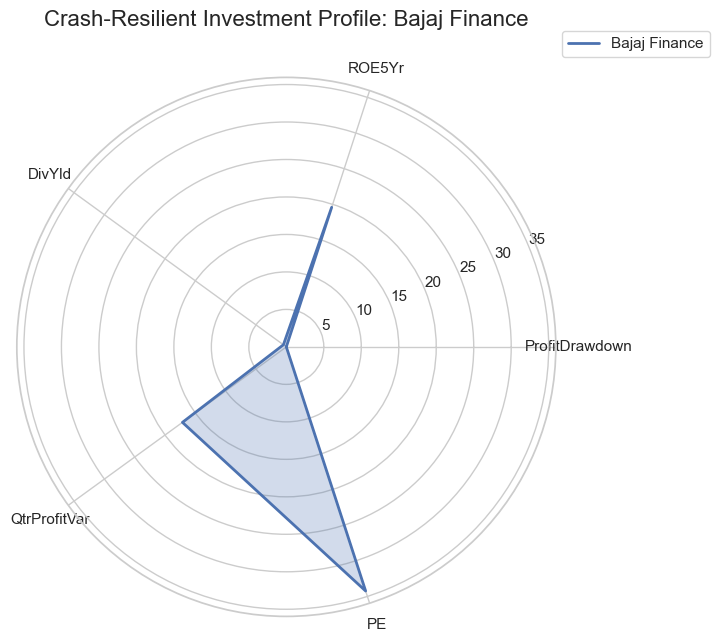

In [28]:
# Crash resilience: Lowest negative QtrProfitVar (already computed as 'ProfitDrawdown')
top5_resilient = df.nsmallest(5, 'ProfitDrawdown')
categories = ['ProfitDrawdown', 'ROE5Yr', 'DivYld', 'QtrProfitVar', 'PE']
for idx, row in top5_resilient.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Crash-Resilient Investment Profile: {row['Name']}") 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
df = pd.read_csv('Top500Cleaned.csv')

In [22]:
df

Name      CMP     PE      MarCap  DivYld     NPQtr  \
0    Reliance Industr  1456.40  28.30  1970868.77    0.34  22611.00   
1           HDFC Bank  1934.70  20.92  1481127.37    1.14  19284.57   
2                 TCS  3561.30  26.56  1288509.51    1.68  12293.00   
3       Bharti Airtel  1814.00  39.22  1087687.53    0.44  12475.80   
4          ICICI Bank  1454.00  20.31  1036571.84    0.69  14353.69   
..                ...      ...    ...         ...     ...       ...   
397      JM Financial   115.18  14.23    11009.40    2.34    235.02   
398   Relaxo Footwear   439.70  64.26    10945.83    0.68     56.22   
399   Marksans Pharma   241.40  29.75    10939.37    0.25    105.06   
400    Vesuvius India  5363.40  42.69    10887.70    0.27     59.31   
401   Engineers India   193.53  26.18    10877.21    1.55    108.73   

     QtrProfitVar   SalesQtr  QtrSalesVar   ROCE  ROE5Yr  ROE3Yr  ROE7Yr  
0            2.41  261388.00        10.51   9.43    8.51    8.89    8.91  
1            6.88   86779.34         9.25   7.51   16.15   16.01   16.24  
2           -1.69   64479.00         5.29  64.63   46.84   50.30   43.96  
3          185.61   47876.20        27.33  15.36   16.96   19.35   13.72  
4           15.69   48386.92        13.57   7.88   16.81   18.02   14.82  
..            ...        ...          ...    ...     ...     ...     ...  
397        782.36    1003.92       -20.37   9.39    7.18    5.67    7.96  
398         -8.42     695.15        -6.97  11.09   11.82    9.14   13.19  
399         26.02     681.85        16.33  20.61   19.40   17.27   18.27  
400        -13.77     482.22         6.37  25.47   13.95   17.38   13.53  
401         71.63     764.59       -11.88  22.21   16.42   16.01   16.03  

[402 rows x 13 columns]

In [23]:
# Set plot style for consistency
sns.set(style="whitegrid") 

plt.rcParams.update({'figure.autolayout': True})

In [24]:
# Select numeric columns (excluding 'Name')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [25]:
# 1. Descriptive Statistics Summary
desc_stats = df[numeric_cols].describe().T
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
print("Descriptive Statistics Summary:\n", desc_stats)


Descriptive Statistics Summary:
               count          mean            std       min         25%  \
CMP           402.0   2895.213532    8509.312172     21.55    437.1125   
PE            402.0     50.229751      59.807573      5.45     22.7800   
MarCap        402.0  90780.753184  180035.547345  10877.21  17778.6875   
DivYld        402.0      0.959303       1.195533      0.00      0.2300   
NPQtr         402.0   1045.300398    2523.506306  -3186.33    117.1050   
QtrProfitVar  402.0    114.660050     954.237573   -148.92     -7.1150   
SalesQtr      402.0   9109.083806   23530.469076      6.65   1068.0775   
QtrSalesVar   402.0     11.625373      18.923543    -71.23      2.4650   
ROCE          402.0     19.771940      13.343653      0.56     10.8875   
ROE5Yr        402.0     16.622065      10.743653    -23.35     11.1975   
ROE3Yr        402.0     17.333682      11.108472    -27.68     11.3550   
ROE7Yr        402.0     16.154353      10.109376    -17.06     10.5775   

    

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


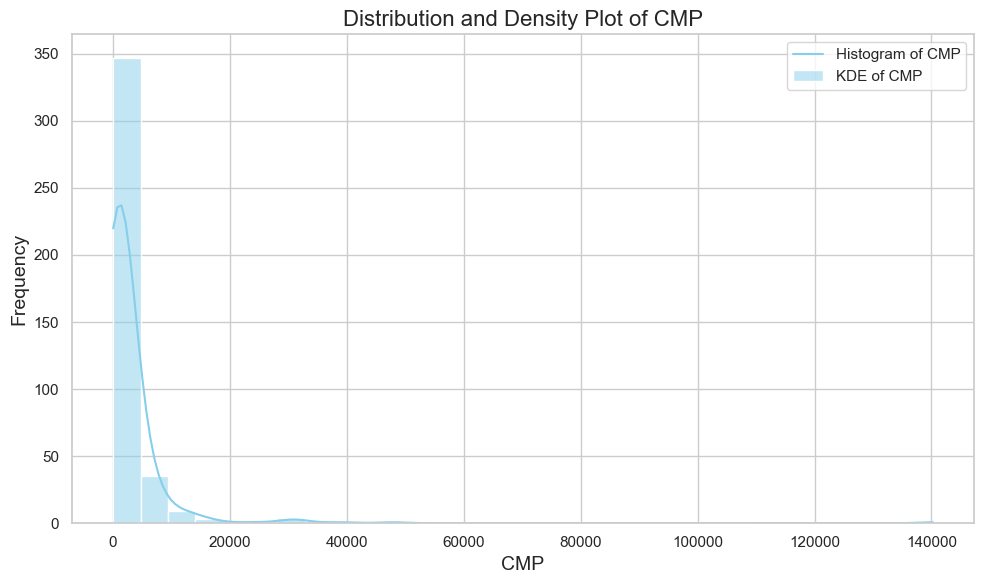

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


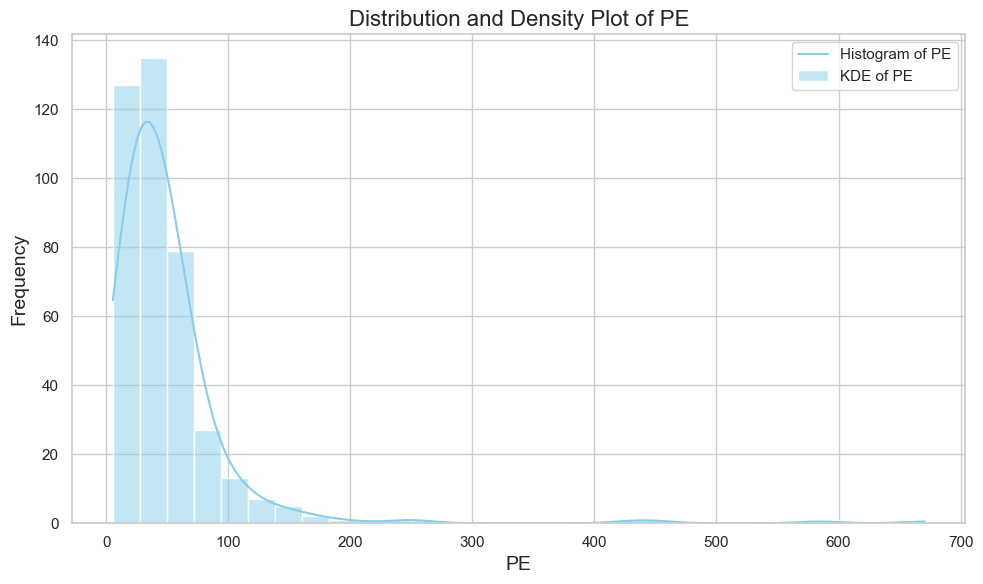

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


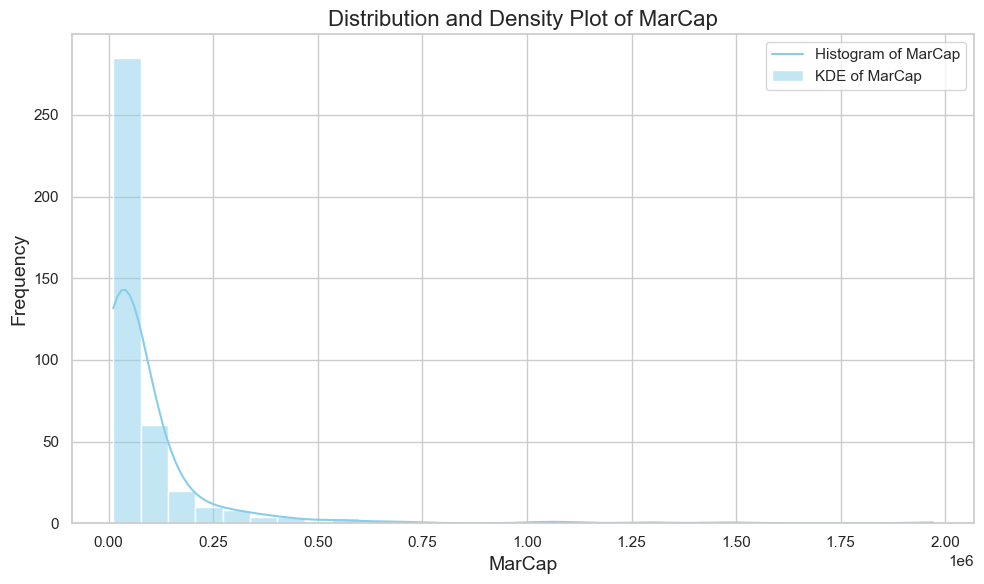

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


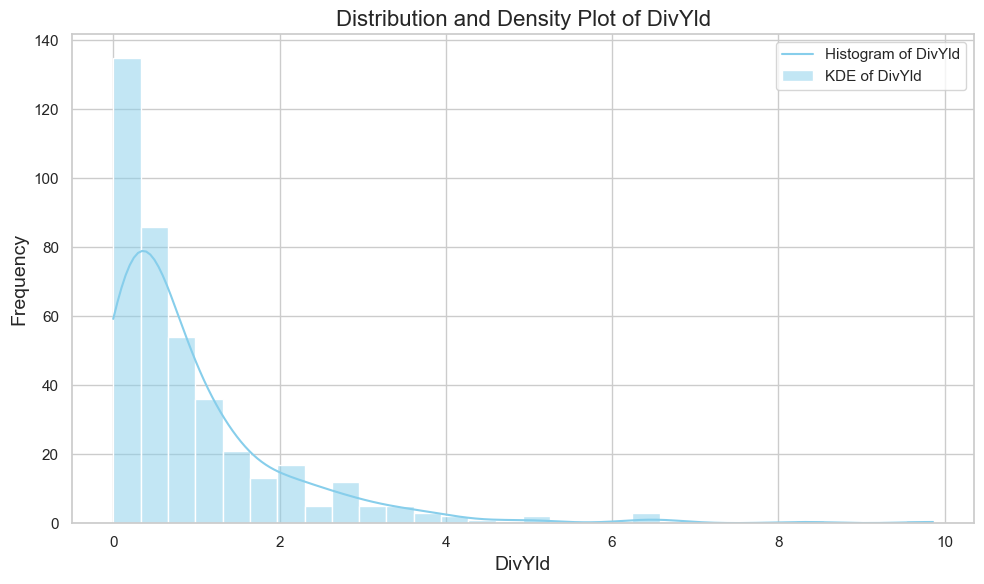

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


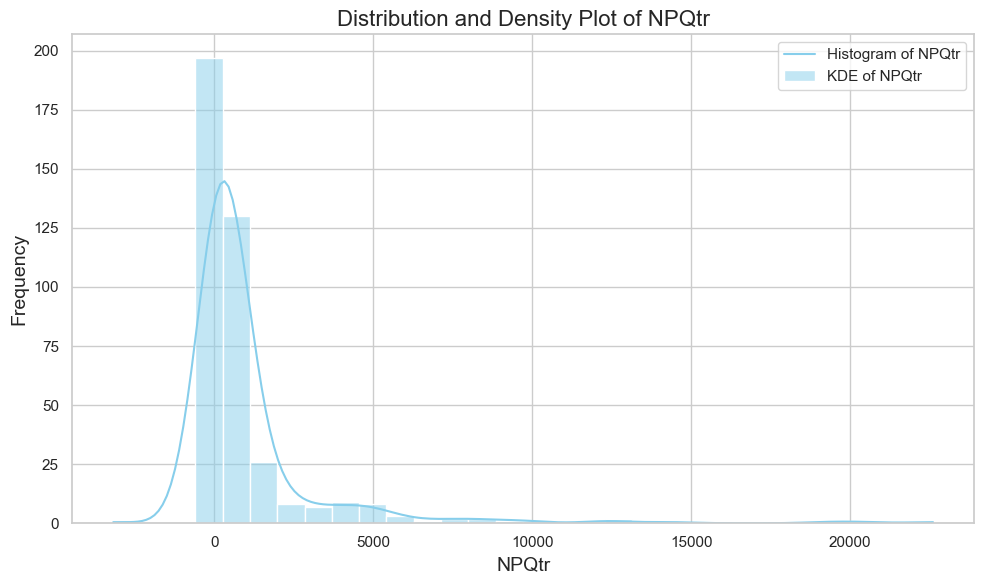

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


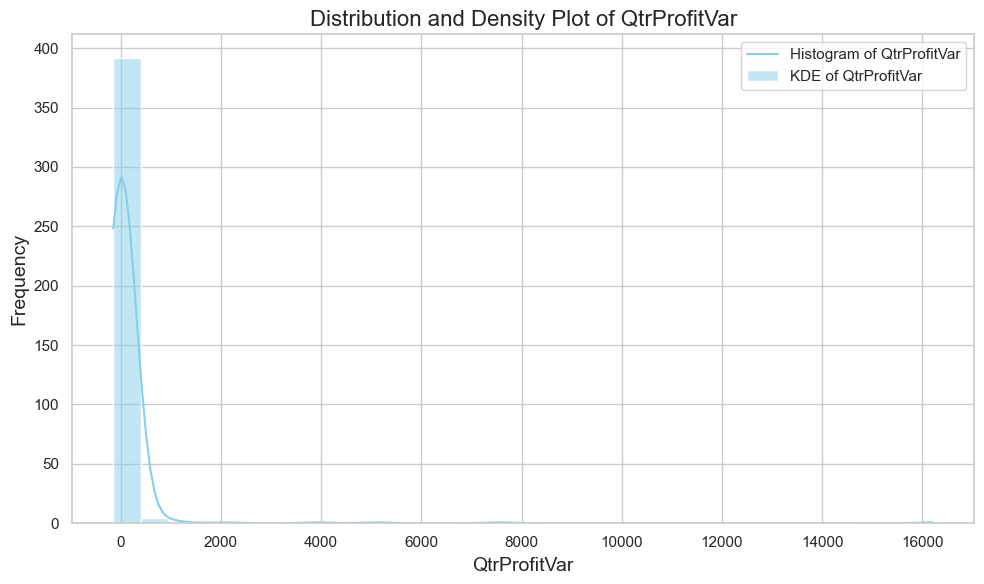

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


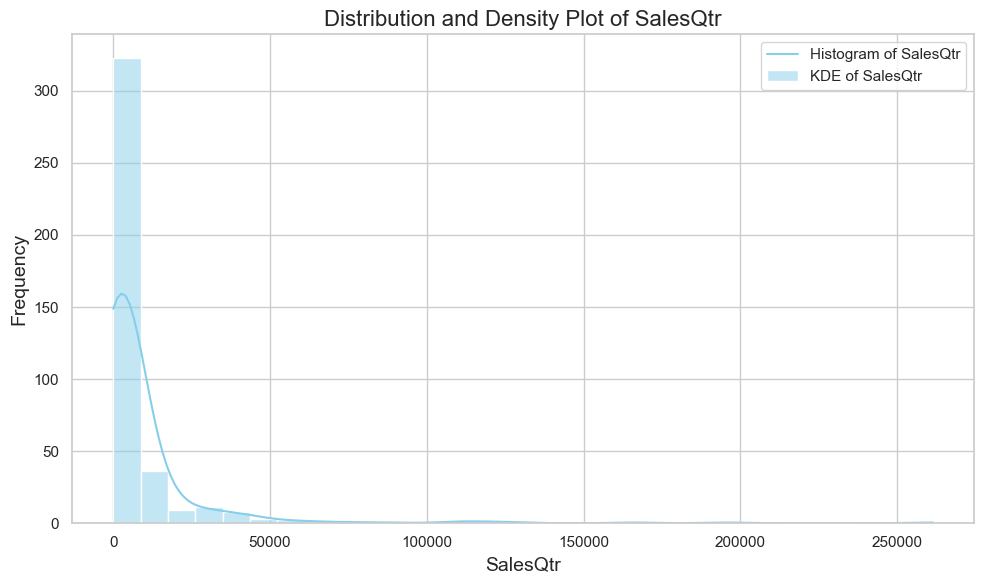

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


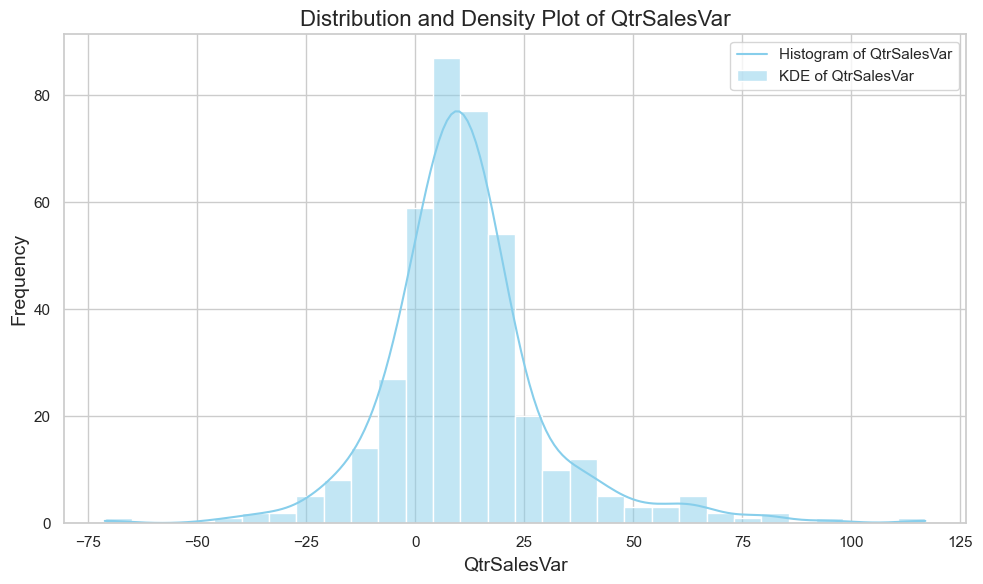

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


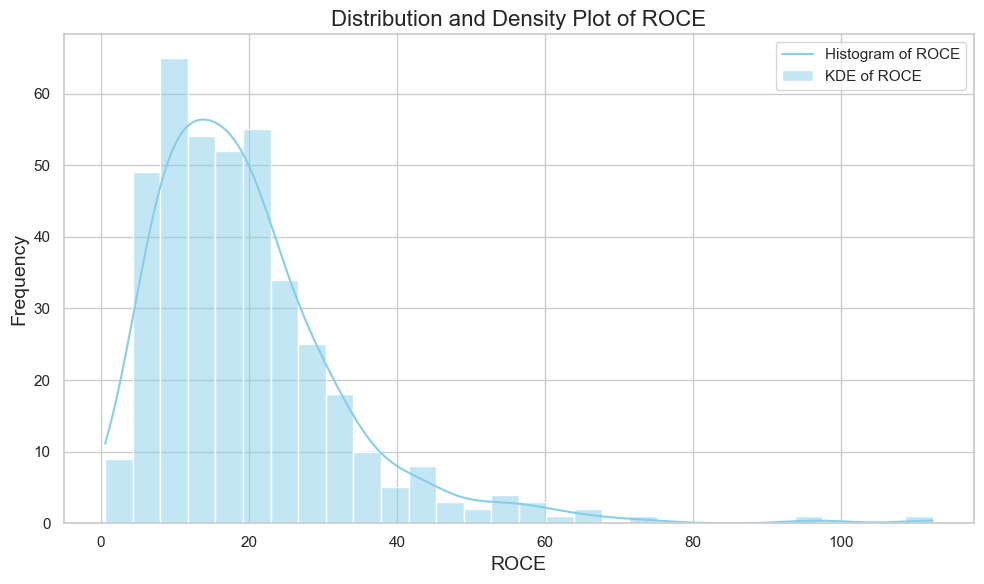

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


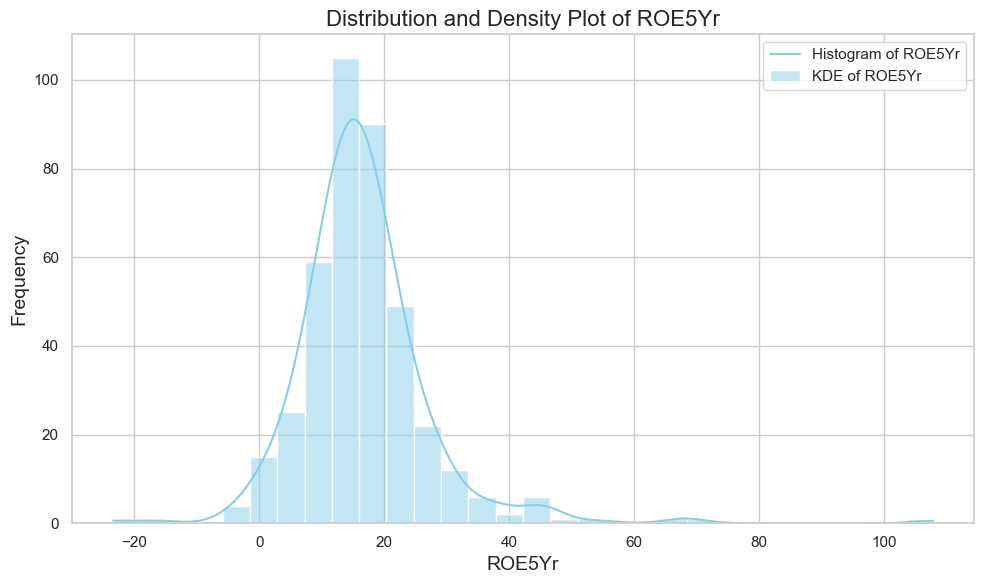

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


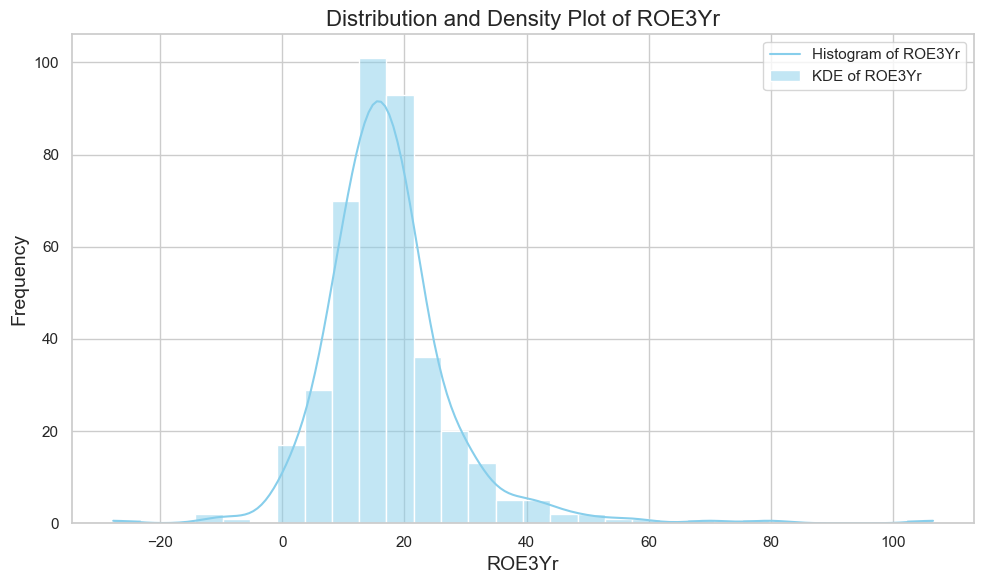

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


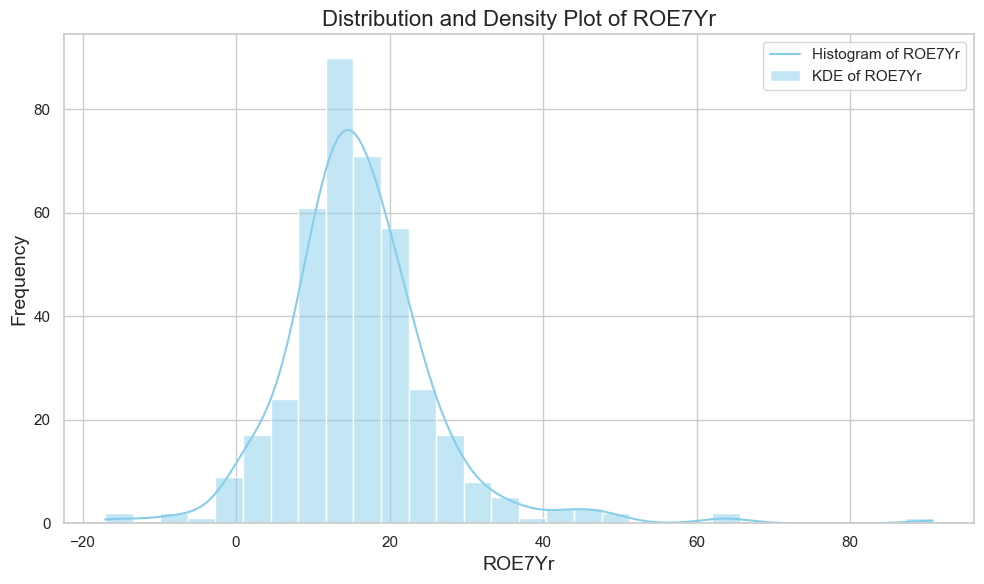

In [27]:
# 2. Distribution Analysis - Histograms + KDE
def plot_hist_kde(col):
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution and Density Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend([f'Histogram of {col}', f'KDE of {col}'])
    plt.show()

for col in numeric_cols:
    plot_hist_kde(col) 


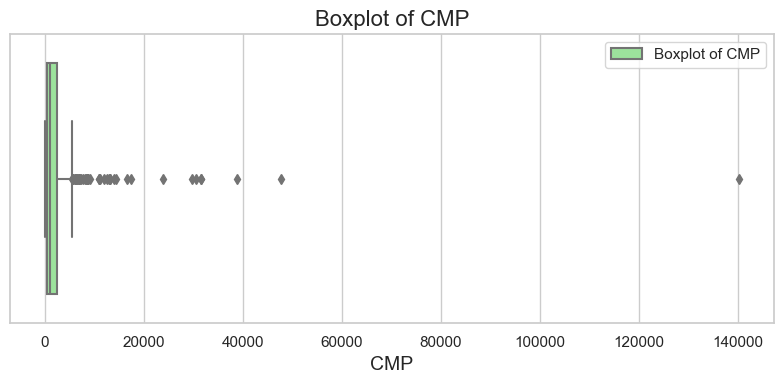

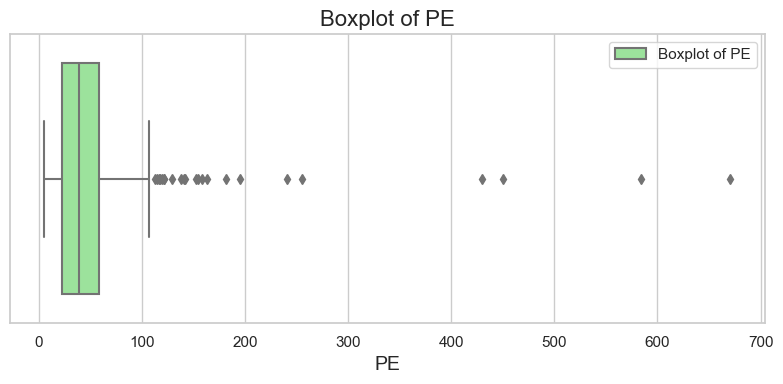

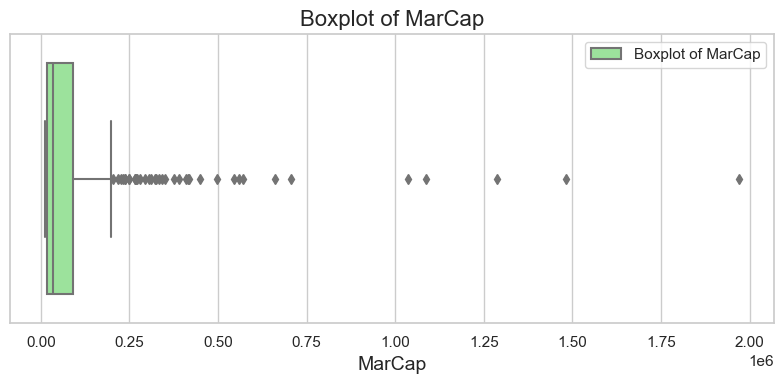

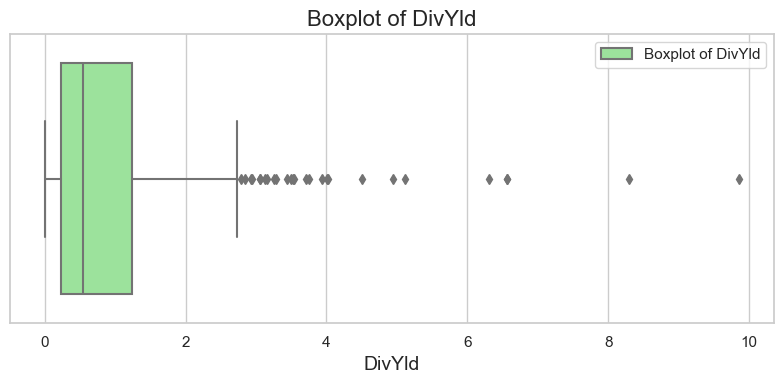

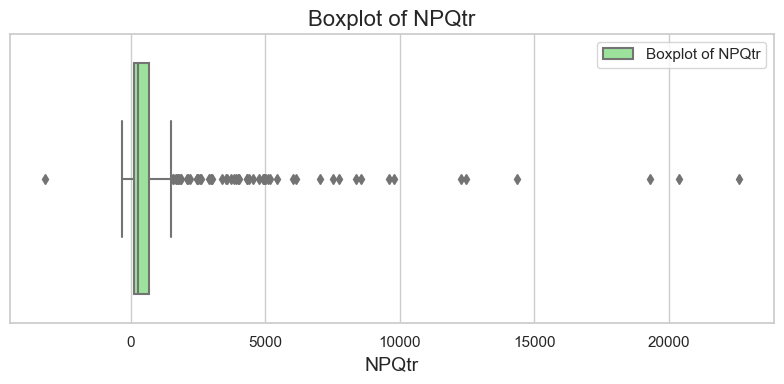

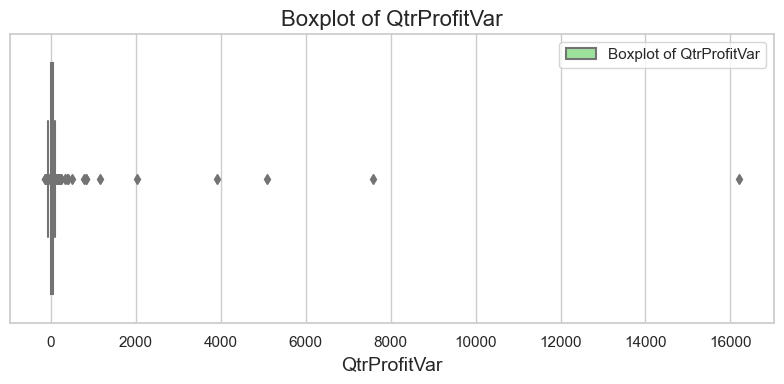

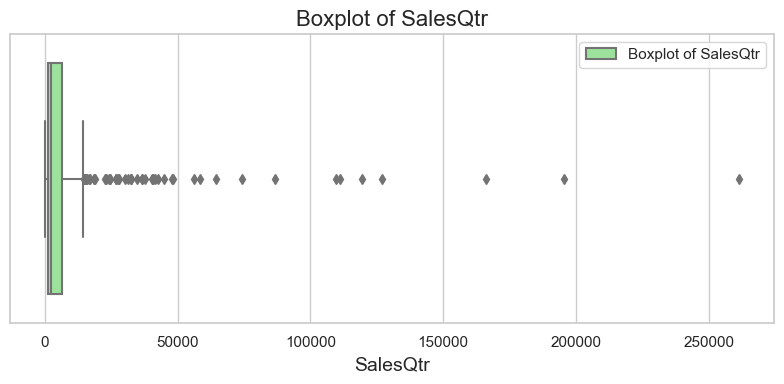

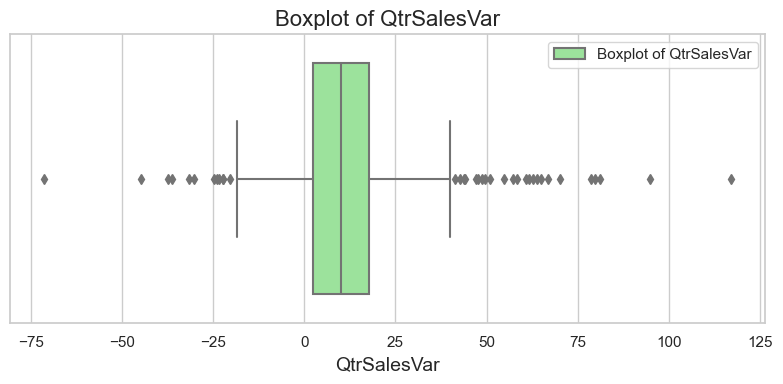

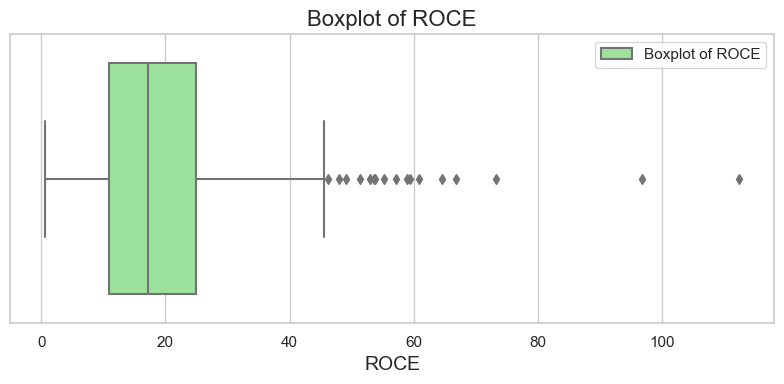

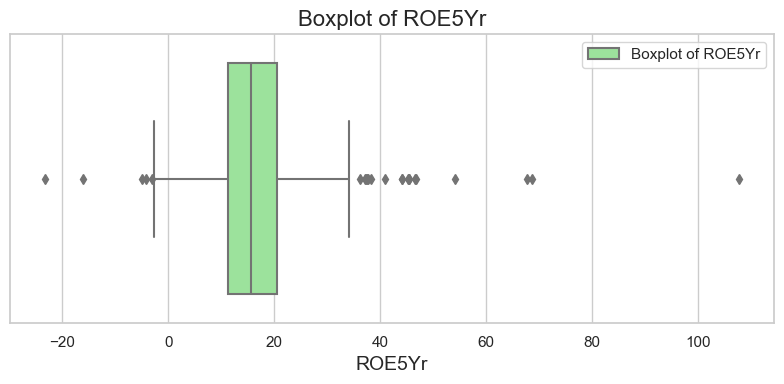

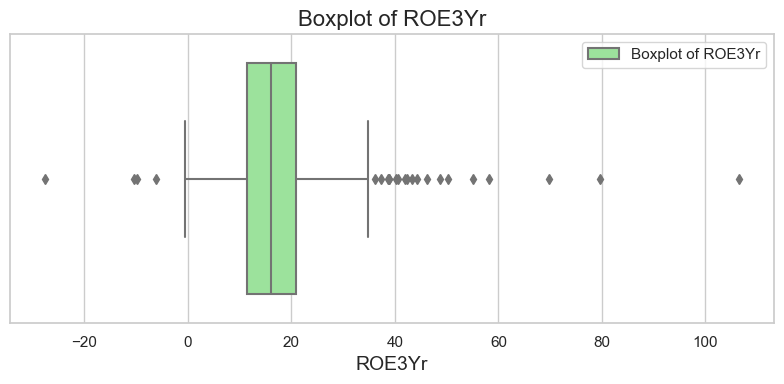

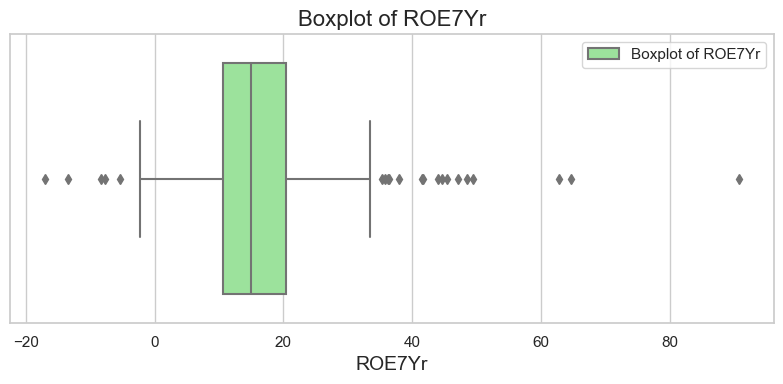

In [28]:
# 3. Boxplots for Outlier Detection
def plot_boxplot(col):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.legend([f'Boxplot of {col}'])
    plt.show()

for col in numeric_cols:
    plot_boxplot(col) 

In [29]:
# 5. Quantile Analysis
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
quantile_df = df[numeric_cols].quantile(quantiles).T
print("Quantile Analysis:\n", quantile_df)

Quantile Analysis:
                    0.10        0.25       0.50        0.75        0.90
CMP             191.766    437.1125    986.500   2474.0000    5807.900
PE               13.433     22.7800     38.705     58.3025      84.909
MarCap        13668.781  17778.6875  35202.900  90653.0575  190433.354
DivYld            0.051      0.2300      0.550      1.2375       2.299
NPQtr            64.930    117.1050    259.660    690.0700    2602.011
QtrProfitVar    -34.954     -7.1150     13.620     34.2425      82.993
SalesQtr        602.926   1068.0775   2435.010   6521.7550   18759.049
QtrSalesVar      -6.951      2.4650      9.950     17.6650      31.769
ROCE              6.791     10.8875     17.245     24.8575      34.540
ROE5Yr            6.073     11.1975     15.635     20.5250      26.948
ROE3Yr            7.451     11.3550     15.965     20.9450      28.132
ROE7Yr            5.881     10.5775     14.970     20.3300      26.533


In [30]:
# 6. Outlier Detection Summary using IQR method
def outlier_summary(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers detected")
    return outliers

print("\nOutlier Detection Summary:")
outliers_dict = {}
for col in numeric_cols:
    outliers_dict[col] = outlier_summary(col) 


Outlier Detection Summary:
CMP: 43 outliers detected
PE: 23 outliers detected
MarCap: 38 outliers detected
DivYld: 27 outliers detected
NPQtr: 58 outliers detected
QtrProfitVar: 48 outliers detected
SalesQtr: 52 outliers detected
QtrSalesVar: 36 outliers detected
ROCE: 17 outliers detected
ROE5Yr: 23 outliers detected
ROE3Yr: 23 outliers detected
ROE7Yr: 21 outliers detected


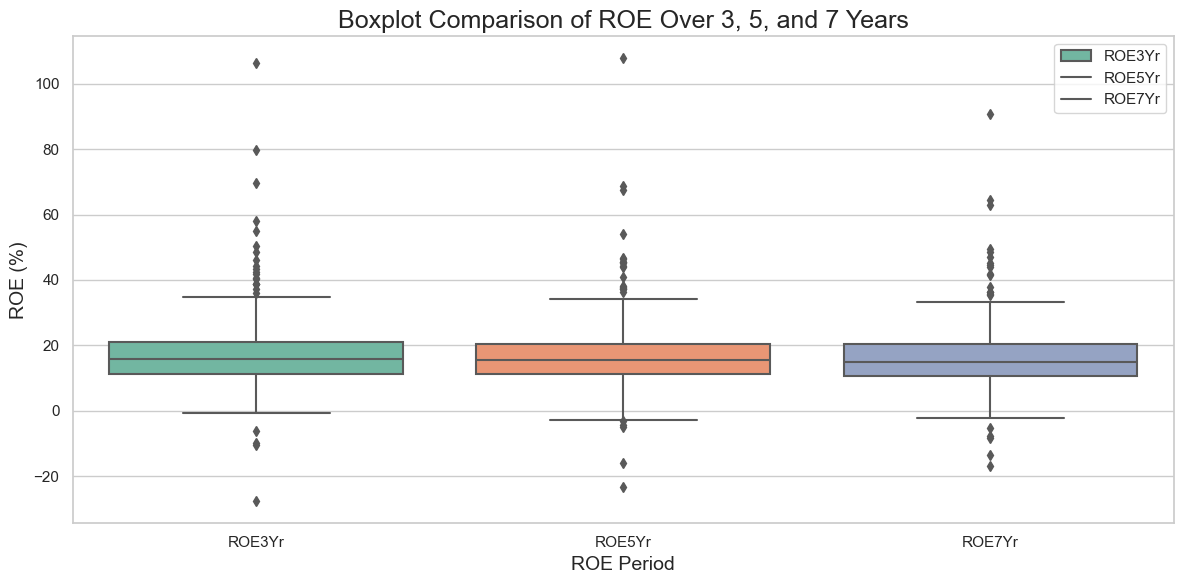

In [31]:
# 7. Trend Over Time for ROE (3, 5, 7 Yr)
roe_cols = ['ROE3Yr', 'ROE5Yr', 'ROE7Yr']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[roe_cols], palette="Set2")
plt.title('Boxplot Comparison of ROE Over 3, 5, and 7 Years', fontsize=18)
plt.xlabel('ROE Period', fontsize=14)
plt.ylabel('ROE (%)', fontsize=14)
plt.legend(roe_cols)
plt.show() 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


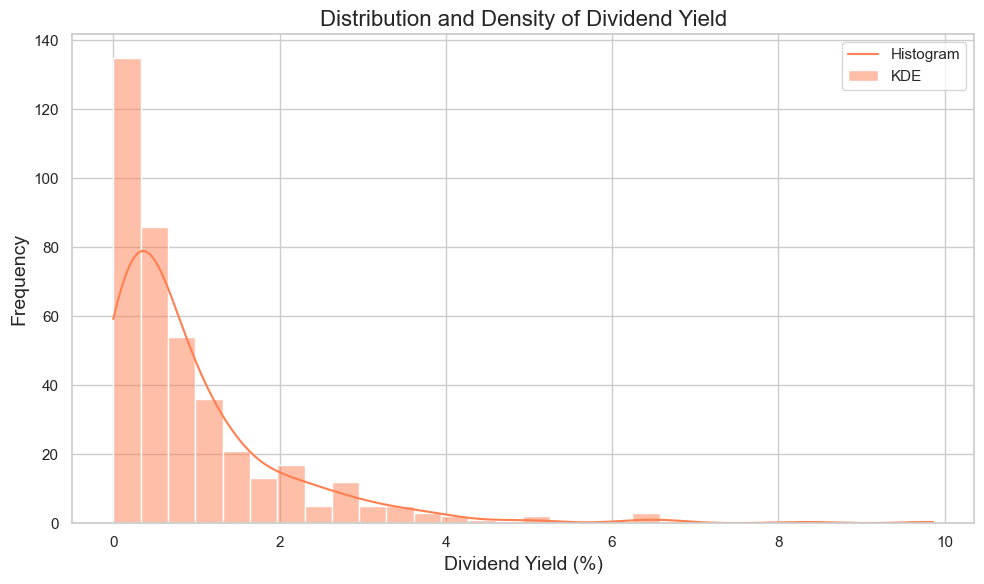

In [32]:
# 8. Dividend Yield Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['DivYld'], bins=30, kde=True, color='coral')
plt.title('Distribution and Density of Dividend Yield', fontsize=16)
plt.xlabel('Dividend Yield (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(['Histogram', 'KDE'])
plt.show() 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


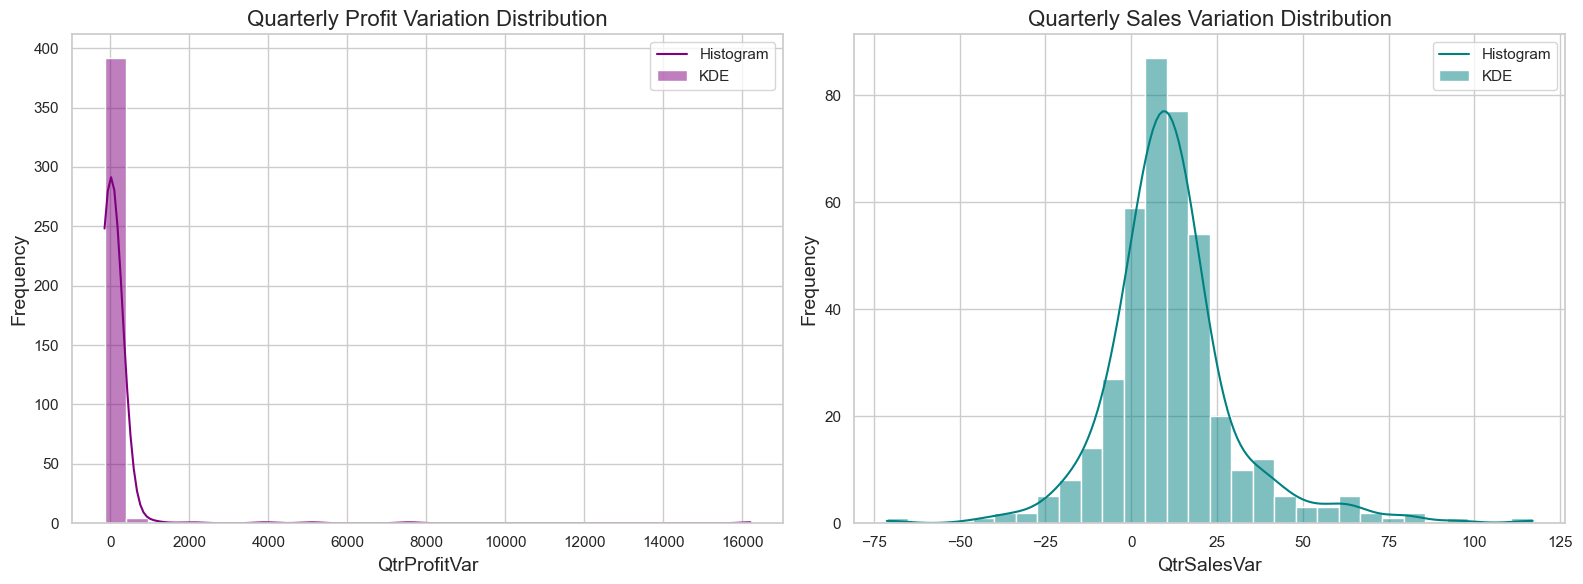

In [34]:
# 9. Profit and Sales Variation Analysis
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.histplot(df['QtrProfitVar'], bins=30, kde=True, color='purple', ax=axes[0])
axes[0].set_title('Quarterly Profit Variation Distribution', fontsize=16)
axes[0].set_xlabel('QtrProfitVar', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].legend(['Histogram', 'KDE'])

sns.histplot(df['QtrSalesVar'], bins=30, kde=True, color='teal', ax=axes[1])
axes[1].set_title('Quarterly Sales Variation Distribution', fontsize=16)
axes[1].set_xlabel('QtrSalesVar', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].legend(['Histogram', 'KDE'])
plt.show() 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


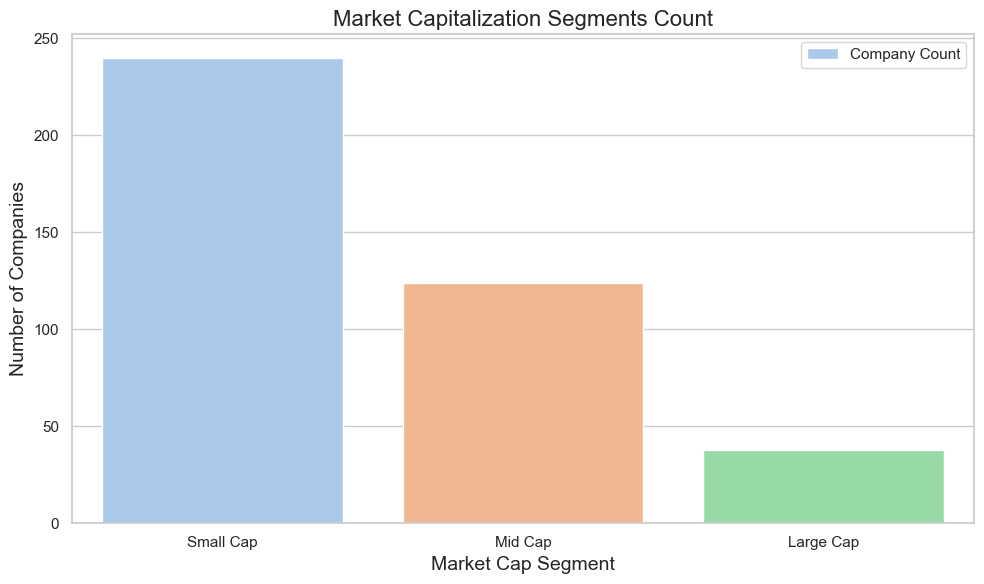

In [35]:
# 10. Market Capitalization Segmentation
# Define buckets (Small < 50k, Mid 50k-200k, Large > 200k in crores or units as per data)
bins = [0, 50000, 200000, df['MarCap'].max()]
labels = ['Small Cap', 'Mid Cap', 'Large Cap']
df['MarketCapSegment'] = pd.cut(df['MarCap'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))
sns.countplot(x='MarketCapSegment', data=df, palette='pastel')
plt.title('Market Capitalization Segments Count', fontsize=16)
plt.xlabel('Market Cap Segment', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend(['Company Count'])
plt.show() 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


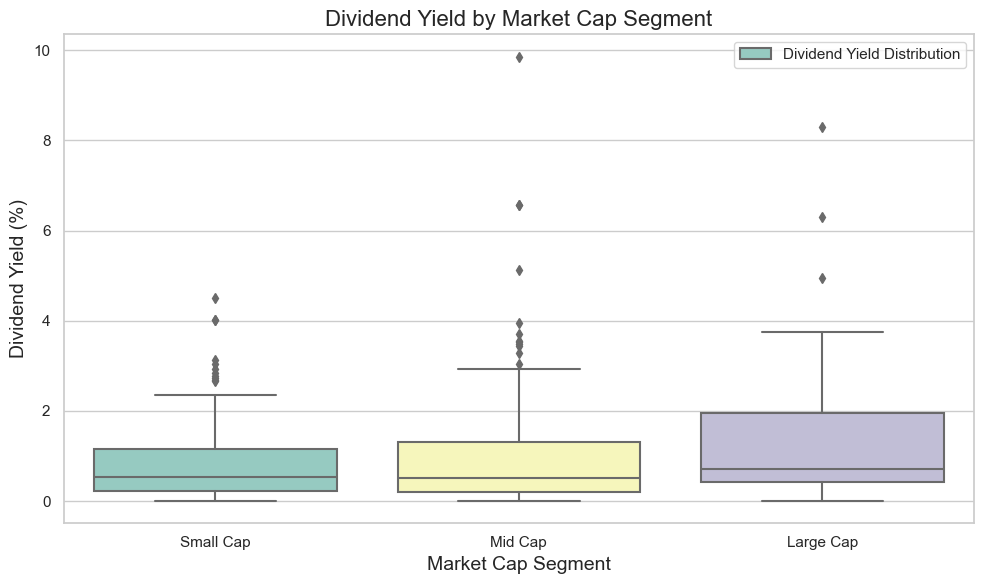

In [36]:
# Compare Dividend Yield across Market Cap segments
plt.figure(figsize=(10,6))
sns.boxplot(x='MarketCapSegment', y='DivYld', data=df, palette='Set3')
plt.title('Dividend Yield by Market Cap Segment', fontsize=16)
plt.xlabel('Market Cap Segment', fontsize=14)
plt.ylabel('Dividend Yield (%)', fontsize=14)
plt.legend(['Dividend Yield Distribution'])
plt.show() 

In [37]:
# Set a consistent style
sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({'figure.autolayout': True})


C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


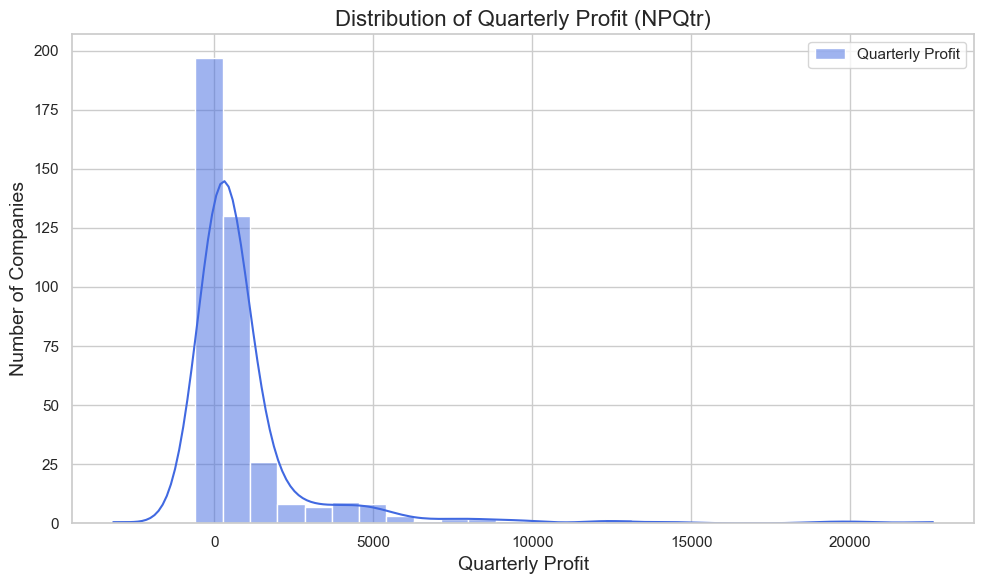

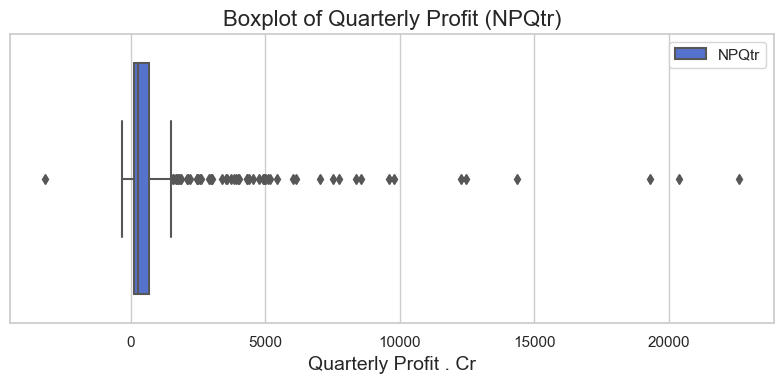

Quarterly Profit (NPQtr) Summary:
count      402.000000
mean      1045.300398
std       2523.506306
min      -3186.330000
25%        117.105000
50%        259.660000
75%        690.070000
max      22611.000000
Name: NPQtr, dtype: float64


In [39]:
# 1. Quarterly Profit (NPQtr)
plt.figure(figsize=(10,6))
sns.histplot(df['NPQtr'], bins=30, kde=True, color='royalblue', label='Quarterly Profit')
plt.title('Distribution of Quarterly Profit (NPQtr)', fontsize=16)
plt.xlabel('Quarterly Profit', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['NPQtr'], color='royalblue')
plt.title('Boxplot of Quarterly Profit (NPQtr)', fontsize=16)
plt.xlabel('Quarterly Profit . Cr', fontsize=14)
plt.legend(['NPQtr'])
plt.show()

print("Quarterly Profit (NPQtr) Summary:") 
print(df['NPQtr'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


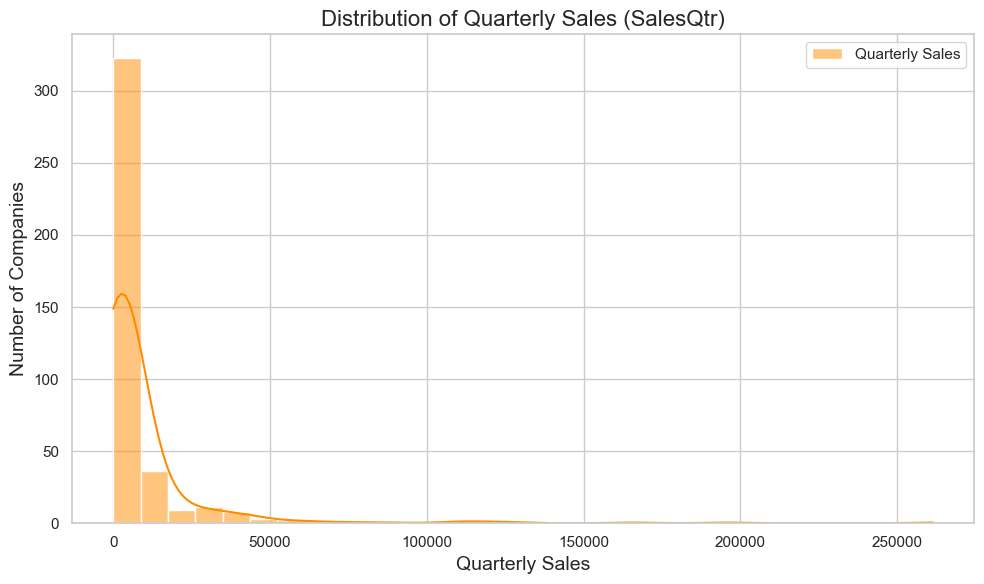

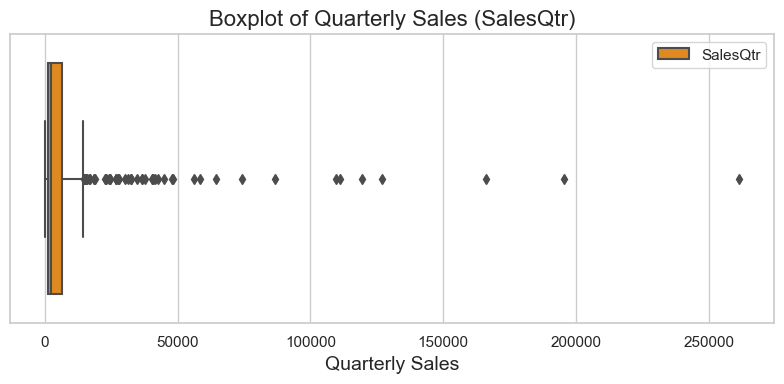

Quarterly Sales (SalesQtr) Summary:
count       402.000000
mean       9109.083806
std       23530.469076
min           6.650000
25%        1068.077500
50%        2435.010000
75%        6521.755000
max      261388.000000
Name: SalesQtr, dtype: float64


In [40]:
# 2. Quarterly Sales (SalesQtr)
plt.figure(figsize=(10,6))
sns.histplot(df['SalesQtr'], bins=30, kde=True, color='darkorange', label='Quarterly Sales')
plt.title('Distribution of Quarterly Sales (SalesQtr)', fontsize=16)
plt.xlabel('Quarterly Sales', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['SalesQtr'], color='darkorange')
plt.title('Boxplot of Quarterly Sales (SalesQtr)', fontsize=16)
plt.xlabel('Quarterly Sales', fontsize=14)
plt.legend(['SalesQtr'])
plt.show()

print("Quarterly Sales (SalesQtr) Summary:")
print(df['SalesQtr'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


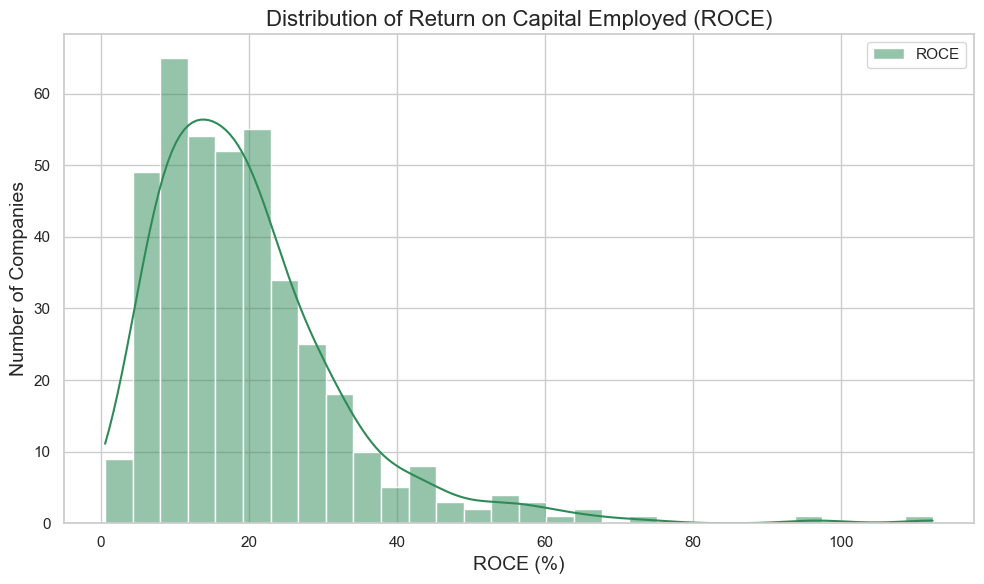

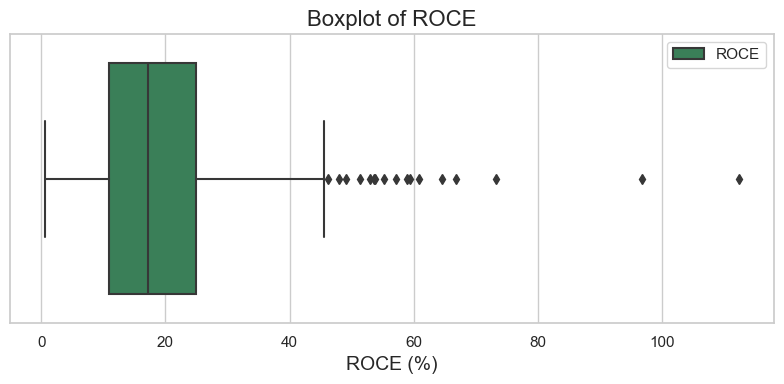

Return on Capital Employed (ROCE) Summary:
count    402.000000
mean      19.771940
std       13.343653
min        0.560000
25%       10.887500
50%       17.245000
75%       24.857500
max      112.440000
Name: ROCE, dtype: float64


In [41]:
# 3. Return on Capital Employed (ROCE)
plt.figure(figsize=(10,6))
sns.histplot(df['ROCE'], bins=30, kde=True, color='seagreen', label='ROCE')
plt.title('Distribution of Return on Capital Employed (ROCE)', fontsize=16)
plt.xlabel('ROCE (%)', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['ROCE'], color='seagreen')
plt.title('Boxplot of ROCE', fontsize=16)
plt.xlabel('ROCE (%)', fontsize=14)
plt.legend(['ROCE'])
plt.show()

print("Return on Capital Employed (ROCE) Summary:")
print(df['ROCE'].describe()) 

In [43]:
# set style 
sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})

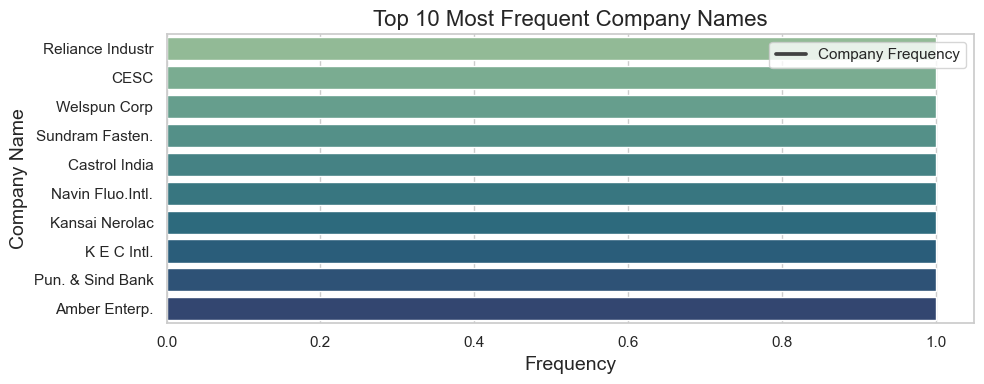

In [44]:
# 1. Name (Categorical)
plt.figure(figsize=(10,4))
top_names = df['Name'].value_counts().head(10)
sns.barplot(x=top_names.values, y=top_names.index, palette="crest")
plt.title('Top 10 Most Frequent Company Names', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Company Name', fontsize=14)
plt.legend(['Company Frequency'])
plt.show() 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


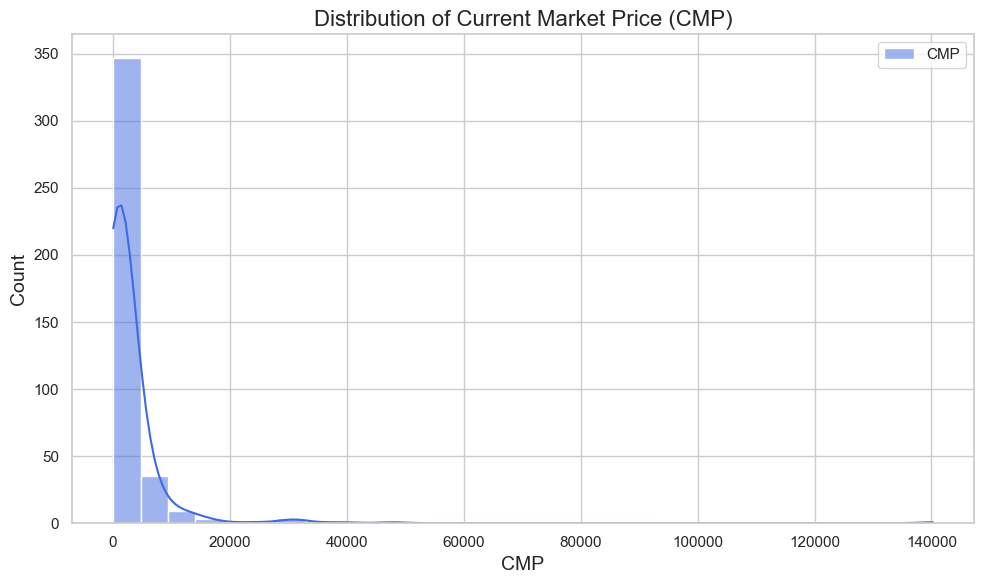

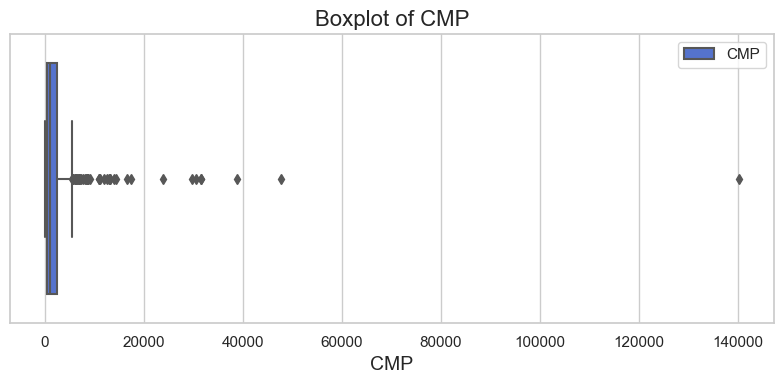

count       402.000000
mean       2895.213532
std        8509.312172
min          21.550000
25%         437.112500
50%         986.500000
75%        2474.000000
max      140265.000000
Name: CMP, dtype: float64


In [46]:
 # 2. CMP (Current Market Price)
plt.figure(figsize=(10,6))
sns.histplot(df['CMP'], bins=30, kde=True, color='royalblue', label='CMP')
plt.title('Distribution of Current Market Price (CMP)', fontsize=16)
plt.xlabel('CMP', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['CMP'], color='royalblue')
plt.title('Boxplot of CMP', fontsize=16)
plt.xlabel('CMP', fontsize=14)
plt.legend(['CMP'])
plt.show()
print(df['CMP'].describe())


C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


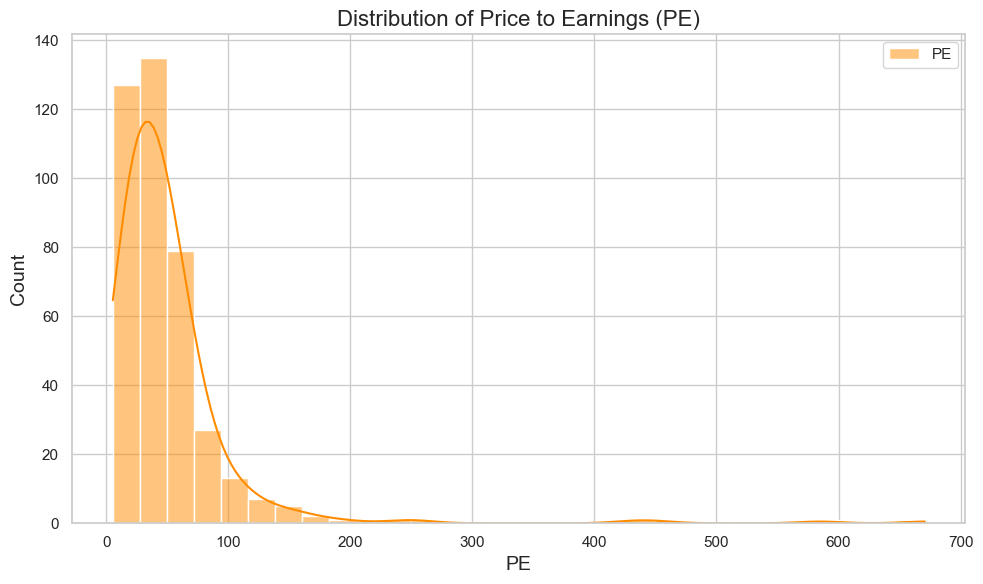

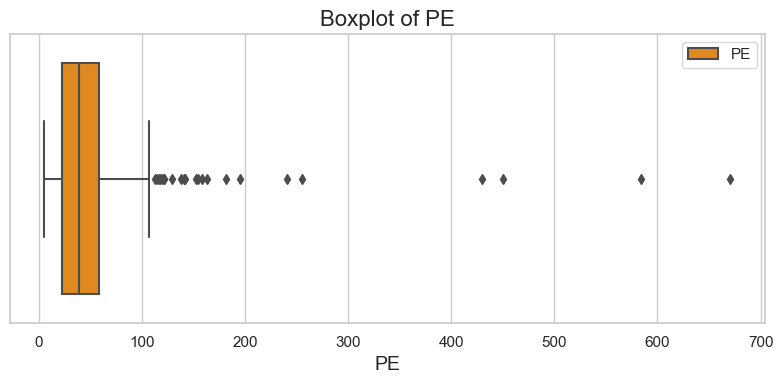

count    402.000000
mean      50.229751
std       59.807573
min        5.450000
25%       22.780000
50%       38.705000
75%       58.302500
max      670.690000
Name: PE, dtype: float64


In [47]:
# 3. PE (Price to Earnings)
plt.figure(figsize=(10,6)) 
sns.histplot(df['PE'], bins=30, kde=True, color='darkorange', label='PE')
plt.title('Distribution of Price to Earnings (PE)', fontsize=16)
plt.xlabel('PE', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['PE'], color='darkorange')
plt.title('Boxplot of PE', fontsize=16)
plt.xlabel('PE', fontsize=14)
plt.legend(['PE'])
plt.show()
print(df['PE'].describe())

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


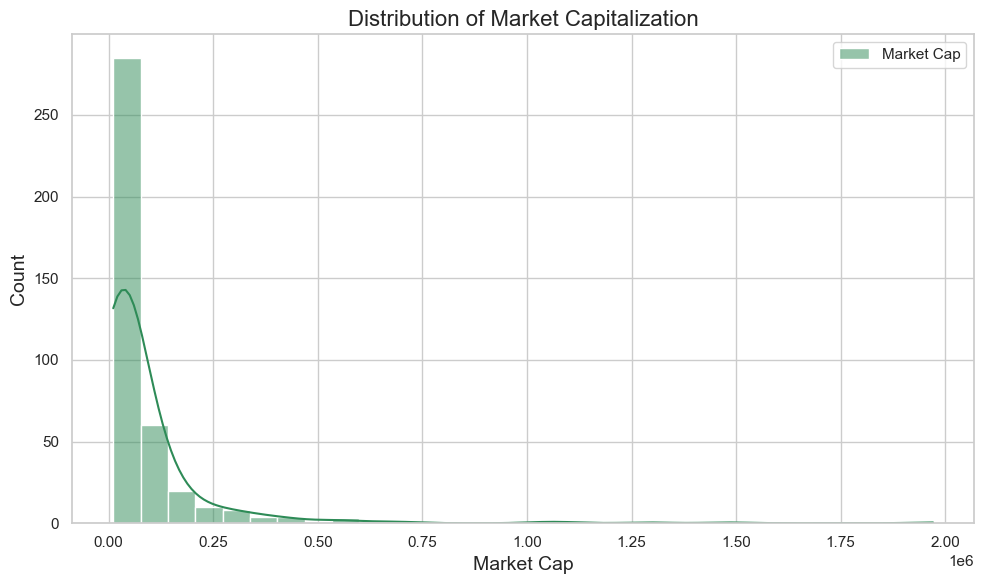

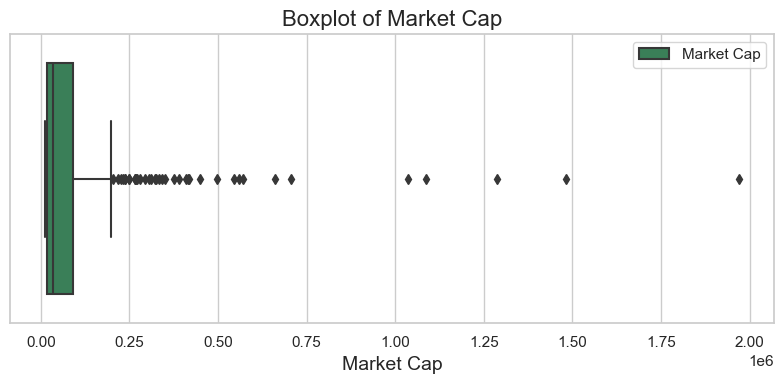

count    4.020000e+02
mean     9.078075e+04
std      1.800355e+05
min      1.087721e+04
25%      1.777869e+04
50%      3.520290e+04
75%      9.065306e+04
max      1.970869e+06
Name: MarCap, dtype: float64


In [48]:
# 4. MarCap (Market Cap)
plt.figure(figsize=(10,6))
sns.histplot(df['MarCap'], bins=30, kde=True, color='seagreen', label='Market Cap')
plt.title('Distribution of Market Capitalization', fontsize=16)
plt.xlabel('Market Cap', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['MarCap'], color='seagreen')
plt.title('Boxplot of Market Cap', fontsize=16)
plt.xlabel('Market Cap', fontsize=14)
plt.legend(['Market Cap'])
plt.show()
print(df['MarCap'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


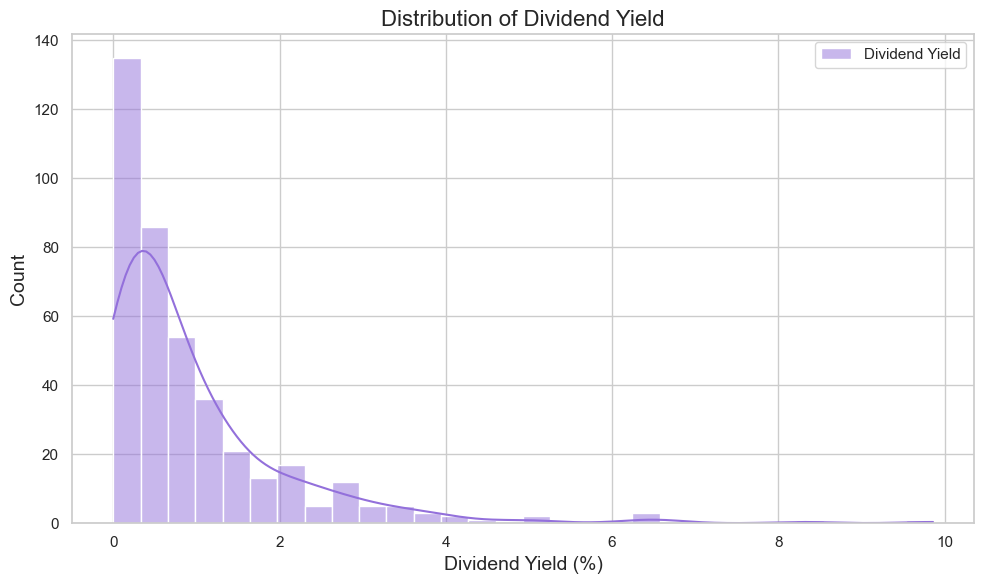

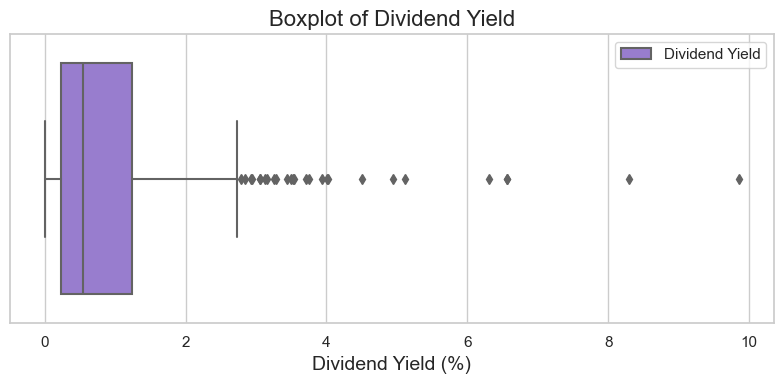

count    402.000000
mean       0.959303
std        1.195533
min        0.000000
25%        0.230000
50%        0.550000
75%        1.237500
max        9.860000
Name: DivYld, dtype: float64


In [49]:
# 5. DivYld (Dividend Yield)
plt.figure(figsize=(10,6))
sns.histplot(df['DivYld'], bins=30, kde=True, color='mediumpurple', label='Dividend Yield')
plt.title('Distribution of Dividend Yield', fontsize=16)
plt.xlabel('Dividend Yield (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['DivYld'], color='mediumpurple')
plt.title('Boxplot of Dividend Yield', fontsize=16)
plt.xlabel('Dividend Yield (%)', fontsize=14)
plt.legend(['Dividend Yield'])
plt.show()
print(df['DivYld'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


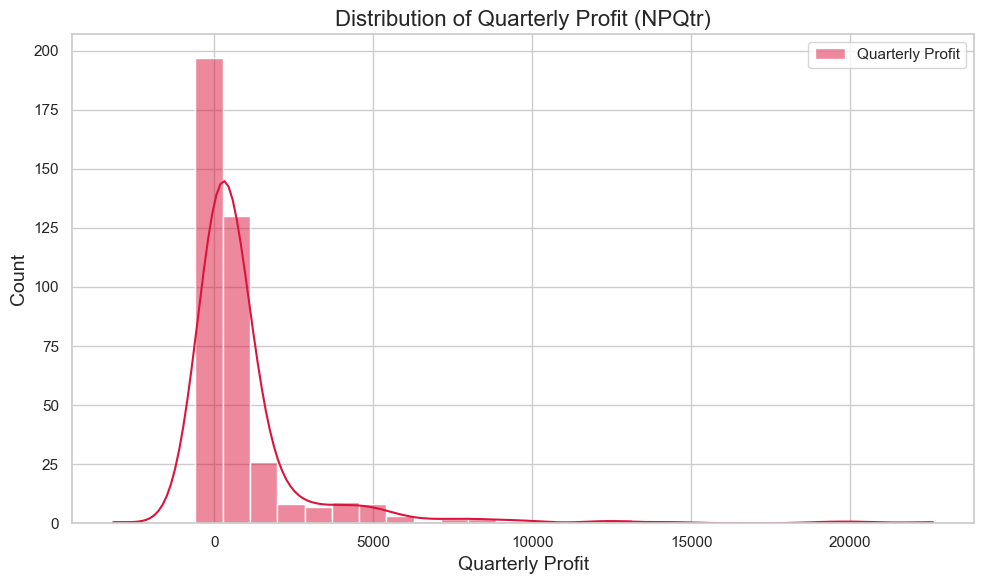

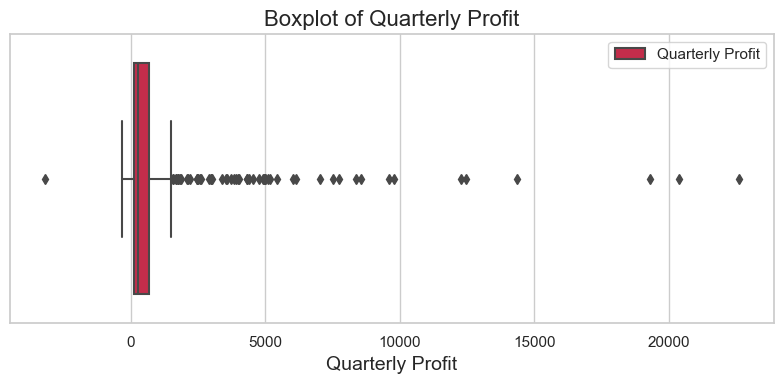

count      402.000000
mean      1045.300398
std       2523.506306
min      -3186.330000
25%        117.105000
50%        259.660000
75%        690.070000
max      22611.000000
Name: NPQtr, dtype: float64


In [50]:
# 6. NPQtr (Net Profit in Quarter)
plt.figure(figsize=(10,6))
sns.histplot(df['NPQtr'], bins=30, kde=True, color='crimson', label='Quarterly Profit')
plt.title('Distribution of Quarterly Profit (NPQtr)', fontsize=16)
plt.xlabel('Quarterly Profit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4)) 
sns.boxplot(x=df['NPQtr'], color='crimson')
plt.title('Boxplot of Quarterly Profit', fontsize=16)
plt.xlabel('Quarterly Profit', fontsize=14)
plt.legend(['Quarterly Profit'])
plt.show()
print(df['NPQtr'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


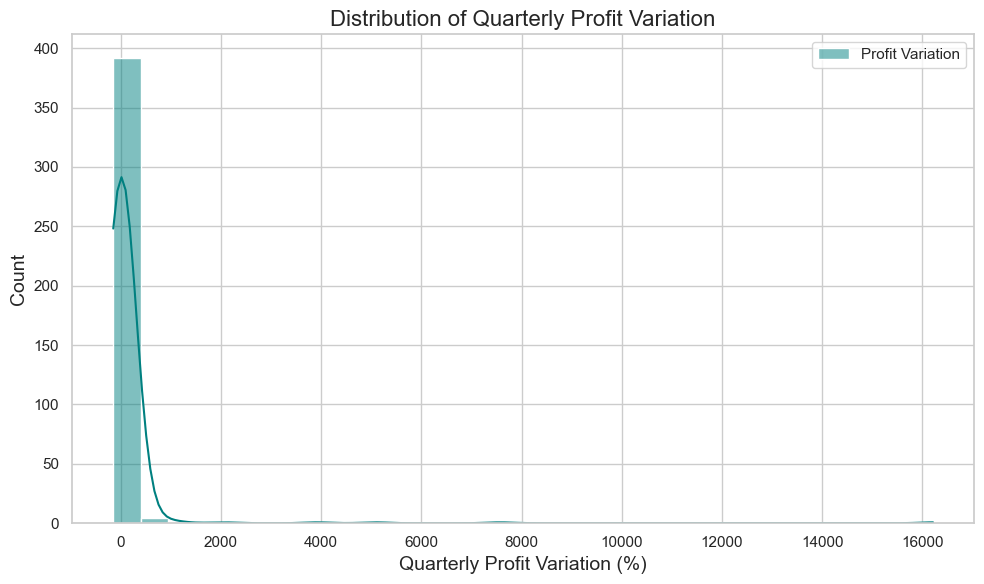

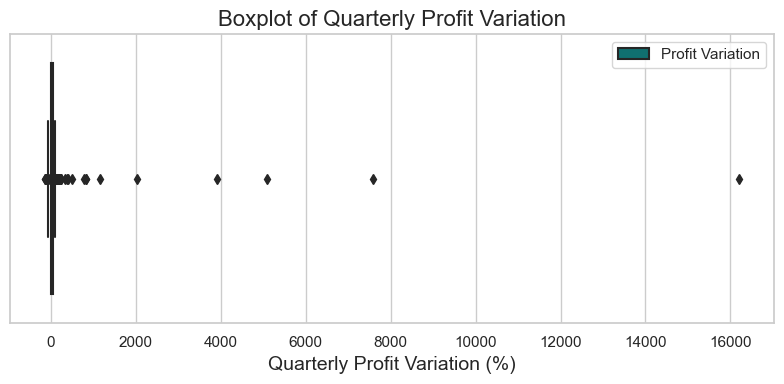

count      402.000000
mean       114.660050
std        954.237573
min       -148.920000
25%         -7.115000
50%         13.620000
75%         34.242500
max      16210.180000
Name: QtrProfitVar, dtype: float64


In [51]:
# 7. QtrProfitVar (Quarterly Profit Variation)
plt.figure(figsize=(10,6))
sns.histplot(df['QtrProfitVar'], bins=30, kde=True, color='teal', label='Profit Variation')
plt.title('Distribution of Quarterly Profit Variation', fontsize=16)
plt.xlabel('Quarterly Profit Variation (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['QtrProfitVar'], color='teal')
plt.title('Boxplot of Quarterly Profit Variation', fontsize=16)
plt.xlabel('Quarterly Profit Variation (%)', fontsize=14)
plt.legend(['Profit Variation'])
plt.show()
print(df['QtrProfitVar'].describe())  

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


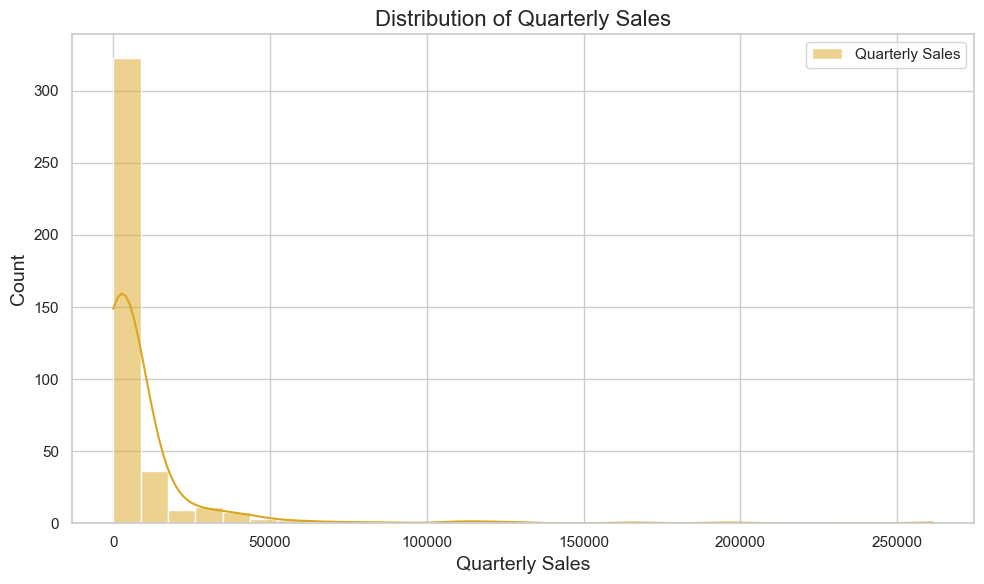

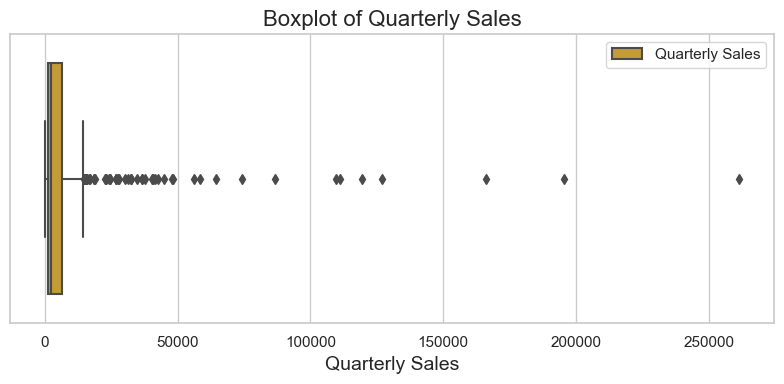

count       402.000000
mean       9109.083806
std       23530.469076
min           6.650000
25%        1068.077500
50%        2435.010000
75%        6521.755000
max      261388.000000
Name: SalesQtr, dtype: float64


In [52]:
# 8. SalesQtr (Quarterly Sales)
plt.figure(figsize=(10,6))
sns.histplot(df['SalesQtr'], bins=30, kde=True, color='goldenrod', label='Quarterly Sales')
plt.title('Distribution of Quarterly Sales', fontsize=16)
plt.xlabel('Quarterly Sales', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['SalesQtr'], color='goldenrod')
plt.title('Boxplot of Quarterly Sales', fontsize=16)
plt.xlabel('Quarterly Sales', fontsize=14)
plt.legend(['Quarterly Sales'])
plt.show()
print(df['SalesQtr'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


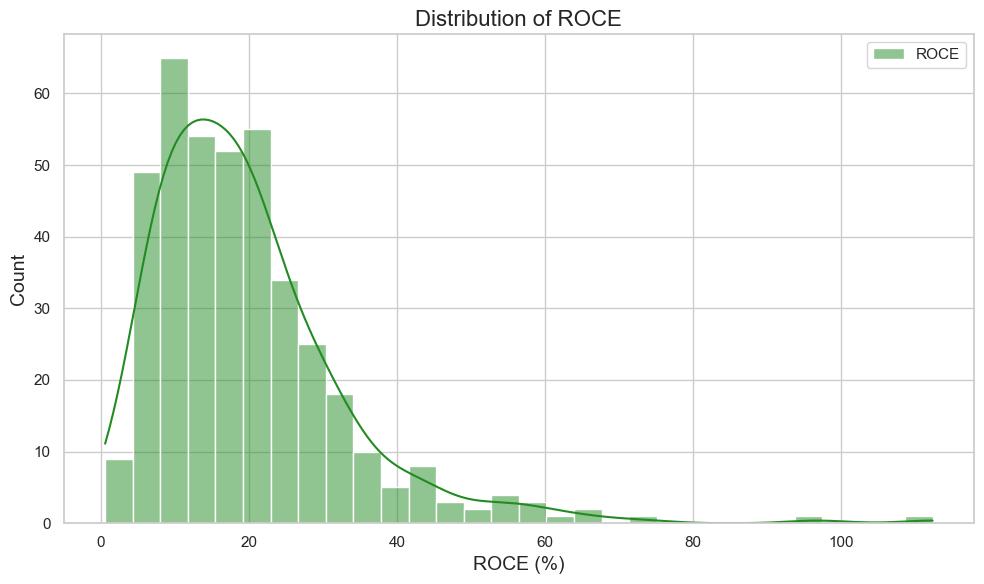

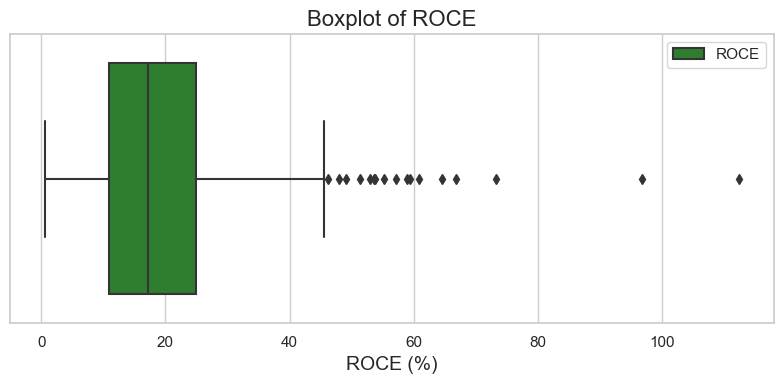

count    402.000000
mean      19.771940
std       13.343653
min        0.560000
25%       10.887500
50%       17.245000
75%       24.857500
max      112.440000
Name: ROCE, dtype: float64


In [53]:
# 10. ROCE (Return on Capital Employed)
plt.figure(figsize=(10,6))
sns.histplot(df['ROCE'], bins=30, kde=True, color='forestgreen', label='ROCE')
plt.title('Distribution of ROCE', fontsize=16)
plt.xlabel('ROCE (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ROCE'], color='forestgreen')
plt.title('Boxplot of ROCE', fontsize=16)
plt.xlabel('ROCE (%)', fontsize=14)
plt.legend(['ROCE'])
plt.show()
print(df['ROCE'].describe())  

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


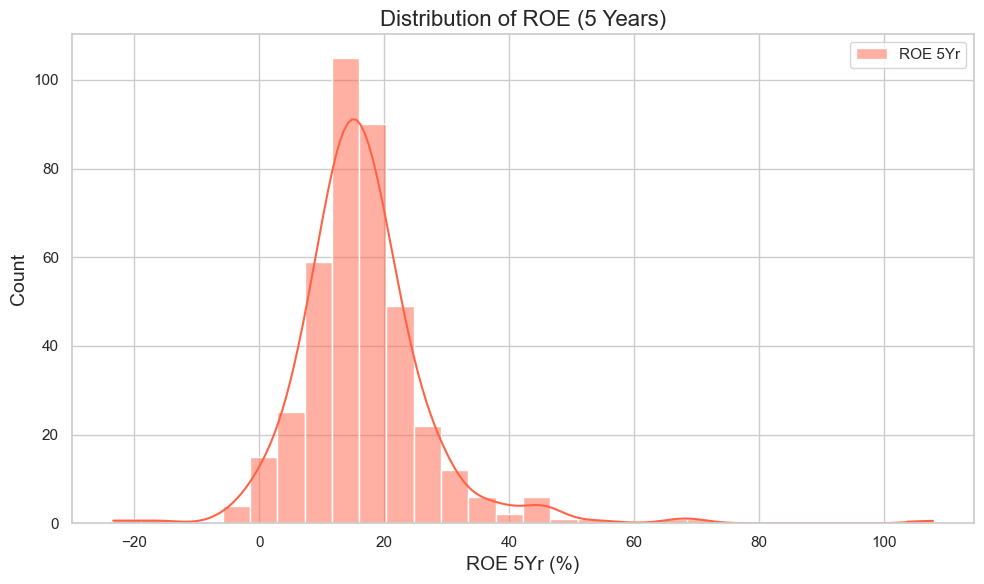

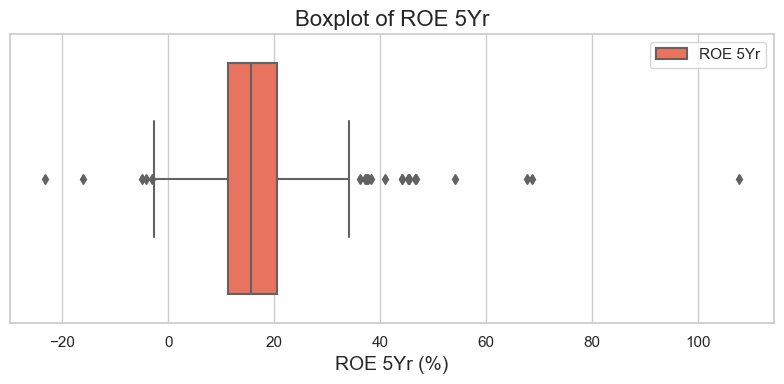

count    402.000000
mean      16.622065
std       10.743653
min      -23.350000
25%       11.197500
50%       15.635000
75%       20.525000
max      107.800000
Name: ROE5Yr, dtype: float64


In [54]:
# 11. ROE5Yr
plt.figure(figsize=(10,6))
sns.histplot(df['ROE5Yr'], bins=30, kde=True, color='tomato', label='ROE 5Yr')
plt.title('Distribution of ROE (5 Years)', fontsize=16)
plt.xlabel('ROE 5Yr (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ROE5Yr'], color='tomato')
plt.title('Boxplot of ROE 5Yr', fontsize=16)
plt.xlabel('ROE 5Yr (%)', fontsize=14)
plt.legend(['ROE 5Yr'])
plt.show()
print(df['ROE5Yr'].describe()) 

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


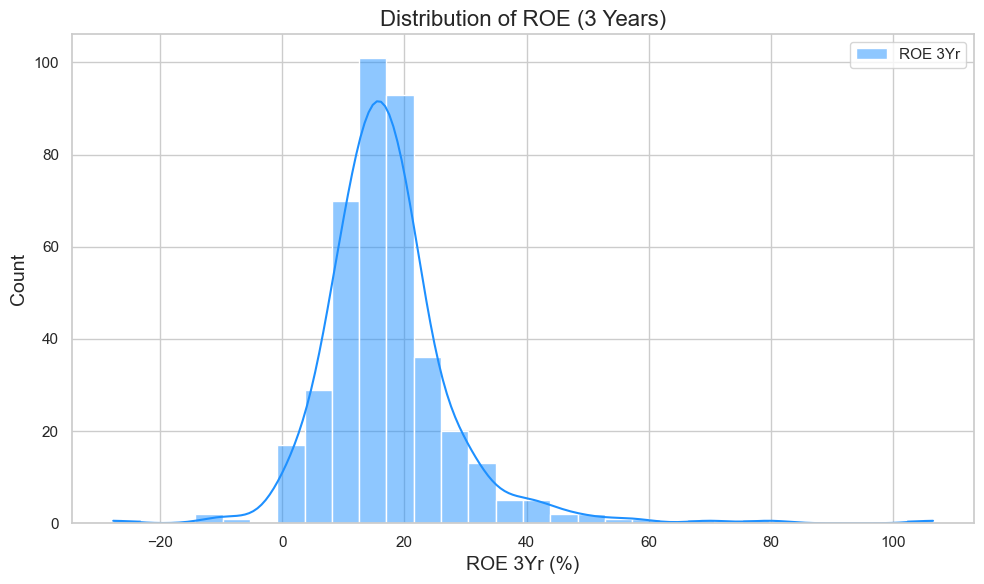

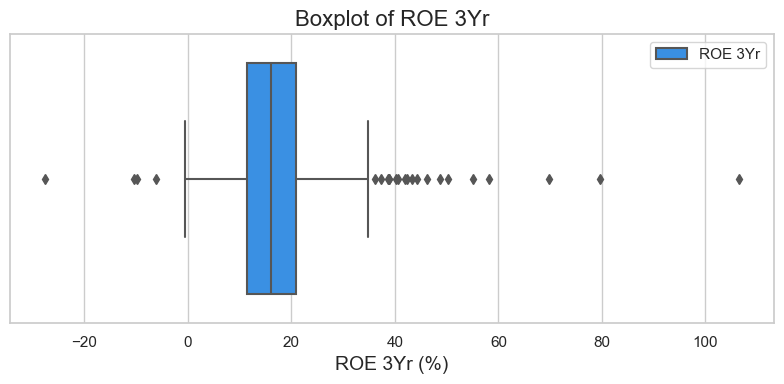

count    402.000000
mean      17.333682
std       11.108472
min      -27.680000
25%       11.355000
50%       15.965000
75%       20.945000
max      106.530000
Name: ROE3Yr, dtype: float64


In [55]:
# 12. ROE3Yr
plt.figure(figsize=(10,6))
sns.histplot(df['ROE3Yr'], bins=30, kde=True, color='dodgerblue', label='ROE 3Yr')
plt.title('Distribution of ROE (3 Years)', fontsize=16)
plt.xlabel('ROE 3Yr (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ROE3Yr'], color='dodgerblue')
plt.title('Boxplot of ROE 3Yr', fontsize=16)
plt.xlabel('ROE 3Yr (%)', fontsize=14)
plt.legend(['ROE 3Yr'])
plt.show() 
print(df['ROE3Yr'].describe())

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


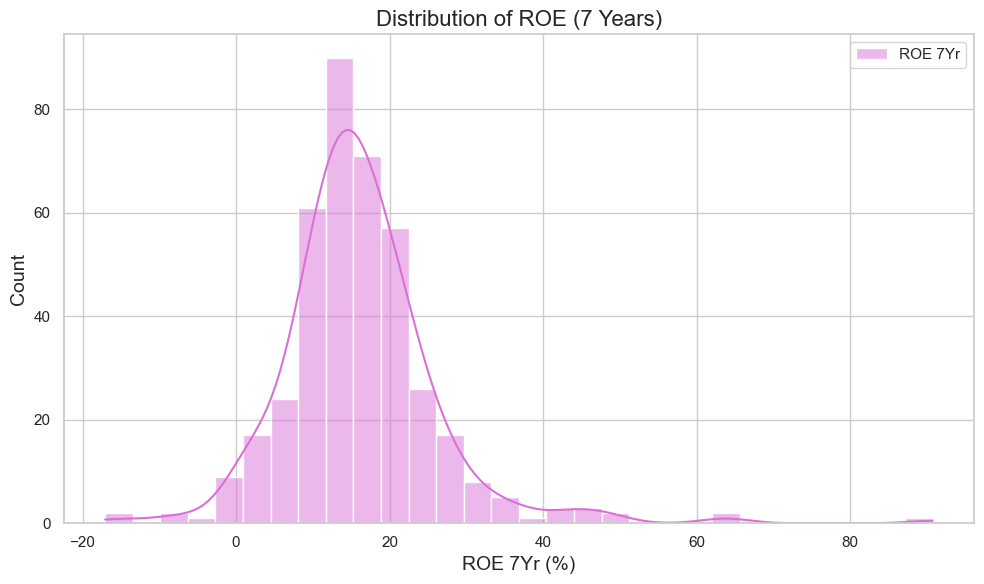

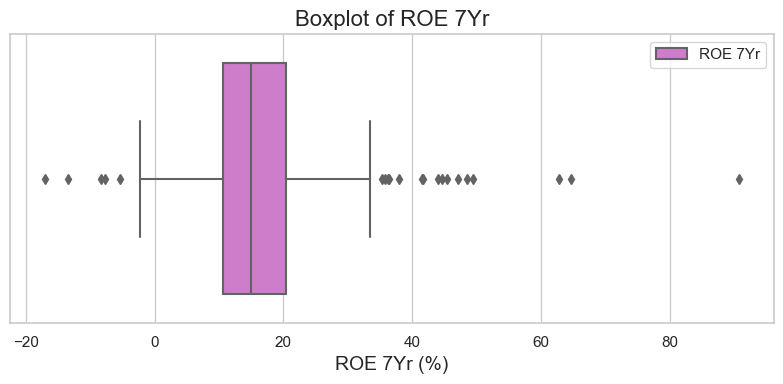

count    402.000000
mean      16.154353
std       10.109376
min      -17.060000
25%       10.577500
50%       14.970000
75%       20.330000
max       90.740000
Name: ROE7Yr, dtype: float64


In [56]:
# 13. ROE7Yr
plt.figure(figsize=(10,6))
sns.histplot(df['ROE7Yr'], bins=30, kde=True, color='orchid', label='ROE 7Yr')
plt.title('Distribution of ROE (7 Years)', fontsize=16)
plt.xlabel('ROE 7Yr (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ROE7Yr'], color='orchid')
plt.title('Boxplot of ROE 7Yr', fontsize=16)
plt.xlabel('ROE 7Yr (%)', fontsize=14)
plt.legend(['ROE 7Yr'])
plt.show()
print(df['ROE7Yr'].describe())  

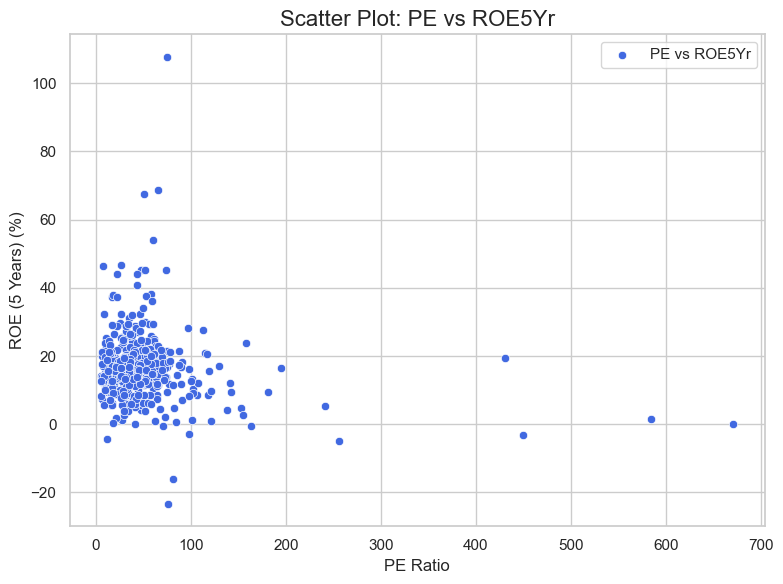

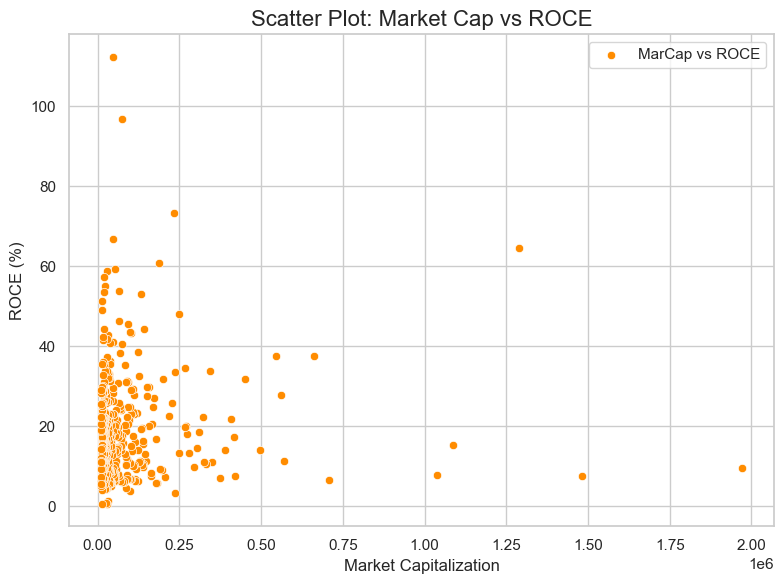

In [58]:
# PE vs ROE5Yr
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PE', y='ROE5Yr', color='royalblue', label='PE vs ROE5Yr')
plt.title('Scatter Plot: PE vs ROE5Yr', fontsize=16)
plt.xlabel('PE Ratio')
plt.ylabel('ROE (5 Years) (%)')
plt.legend()
plt.show()

# MarCap vs ROCE
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='MarCap', y='ROCE', color='darkorange', label='MarCap vs ROCE')
plt.title('Scatter Plot: Market Cap vs ROCE', fontsize=16)
plt.xlabel('Market Capitalization')
plt.ylabel('ROCE (%)')
plt.legend()
plt.show()

C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

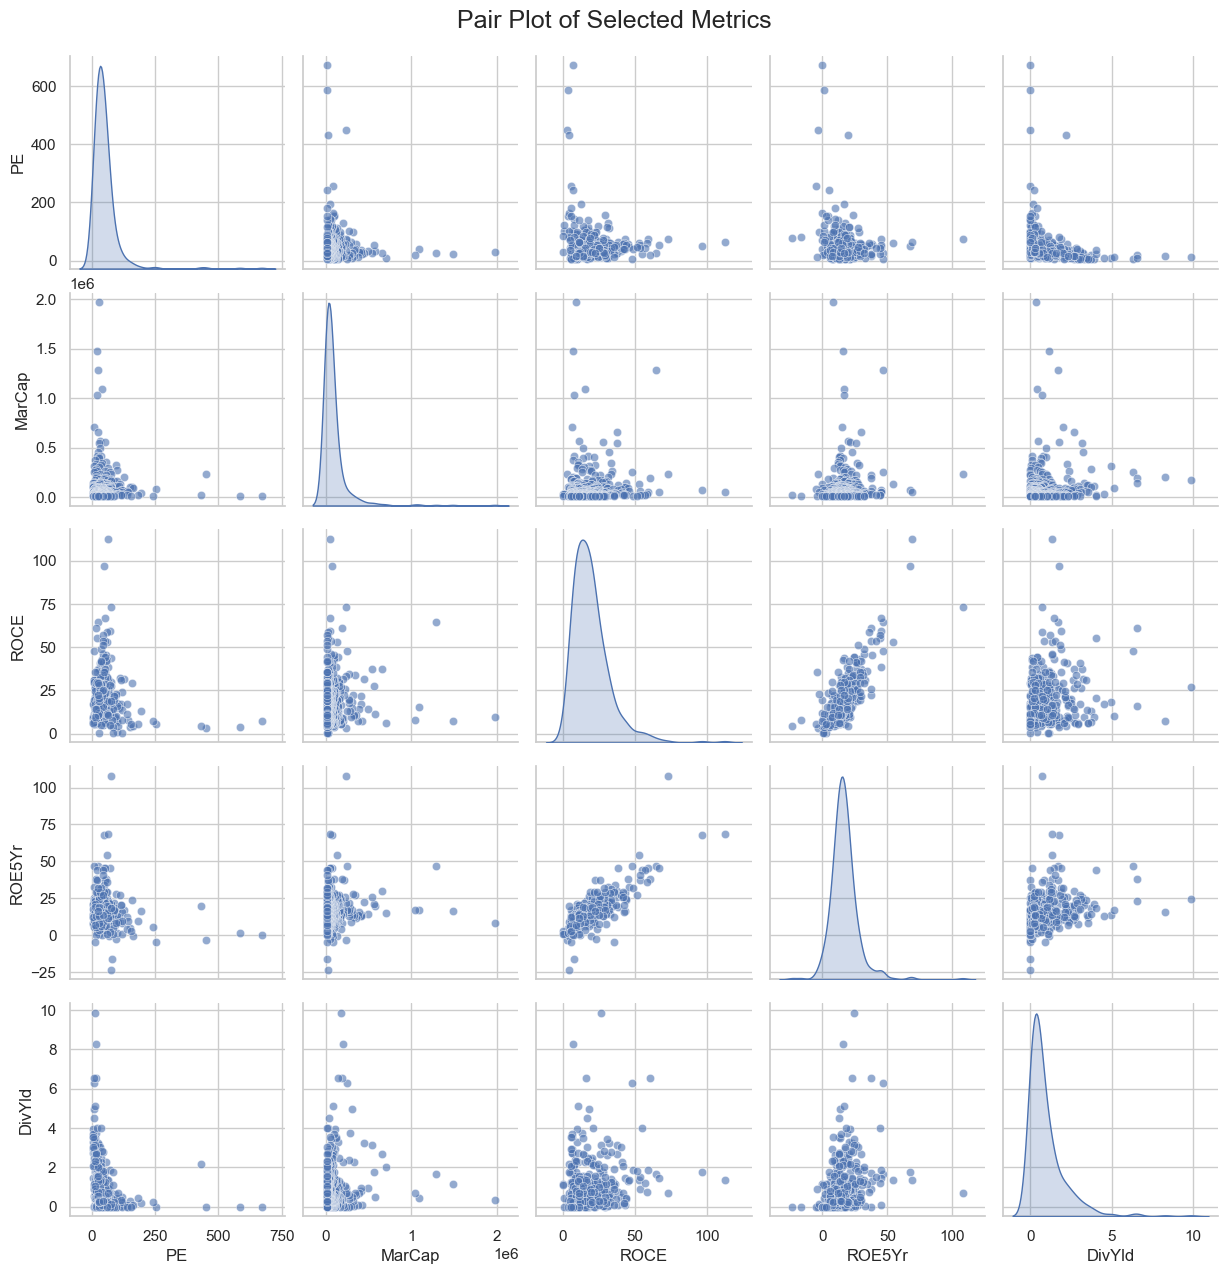

In [59]:
# Select a subset of relevant metrics
pairplot_cols = ['PE', 'MarCap', 'ROCE', 'ROE5Yr', 'DivYld']
sns.pairplot(df[pairplot_cols], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Selected Metrics', y=1.02, fontsize=18)
plt.show() 

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Remove non-numeric columns for PCA
features = num_df.dropna(axis=1)  # Drop columns with NaNs for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

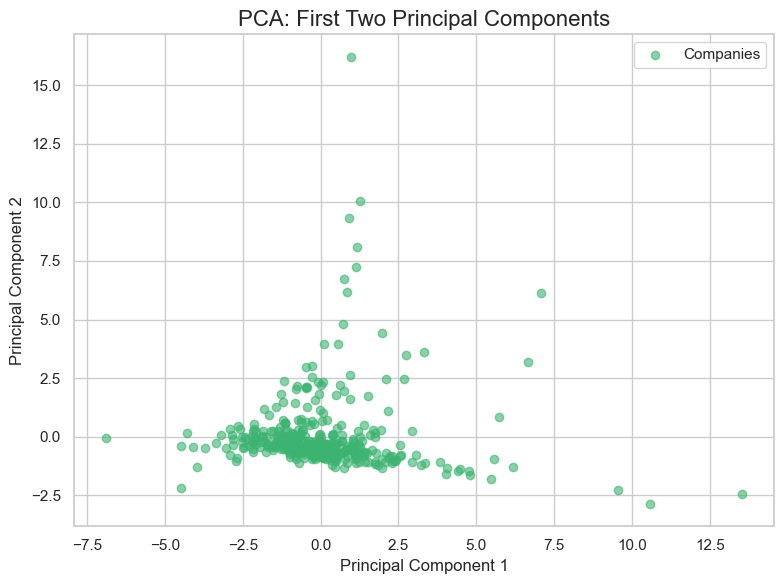

In [61]:
# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, c='mediumseagreen', label='Companies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components', fontsize=16)
plt.legend()
plt.show() 

In [62]:
# Explained variance
print("Explained variance ratio (first 2 components):", pca.explained_variance_ratio_) 

Explained variance ratio (first 2 components): [0.31695266 0.22574224]


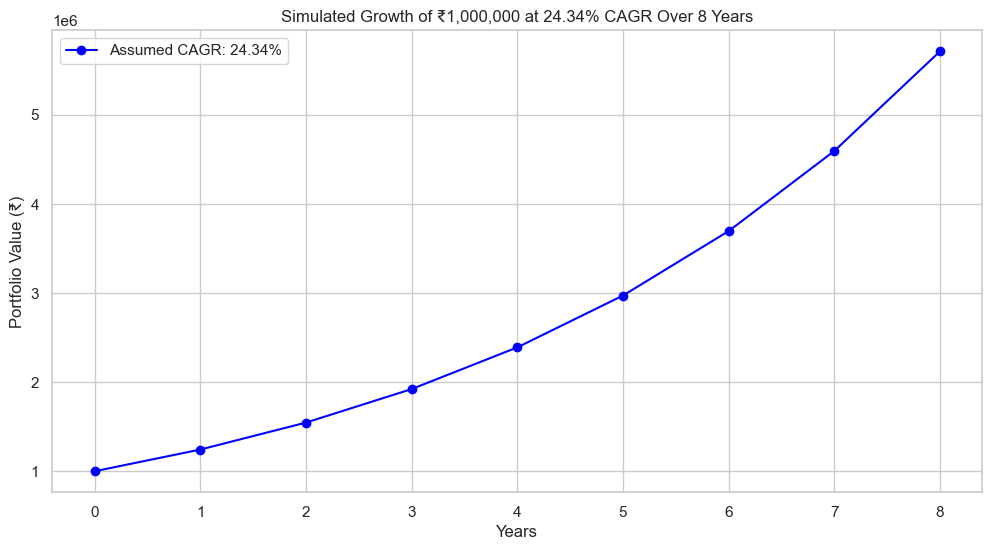

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Inputs
initial_investment = 10_00_000  # ₹10 lakh
years = 8
cagr = 0.2434  # 24.34%

# Calculate portfolio value each year
year_list = np.arange(0, years + 1)
portfolio_value = initial_investment * (1 + cagr) ** year_list

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(year_list, portfolio_value, marker='o', color='blue', label=f'Assumed CAGR: {cagr * 100:.2f}%')
plt.title(f'Simulated Growth of ₹{initial_investment:,} at {cagr*100:.2f}% CAGR Over {years} Years')
plt.xlabel("Years")
plt.ylabel("Portfolio Value (₹)")
plt.grid(True)
plt.legend()
plt.show()


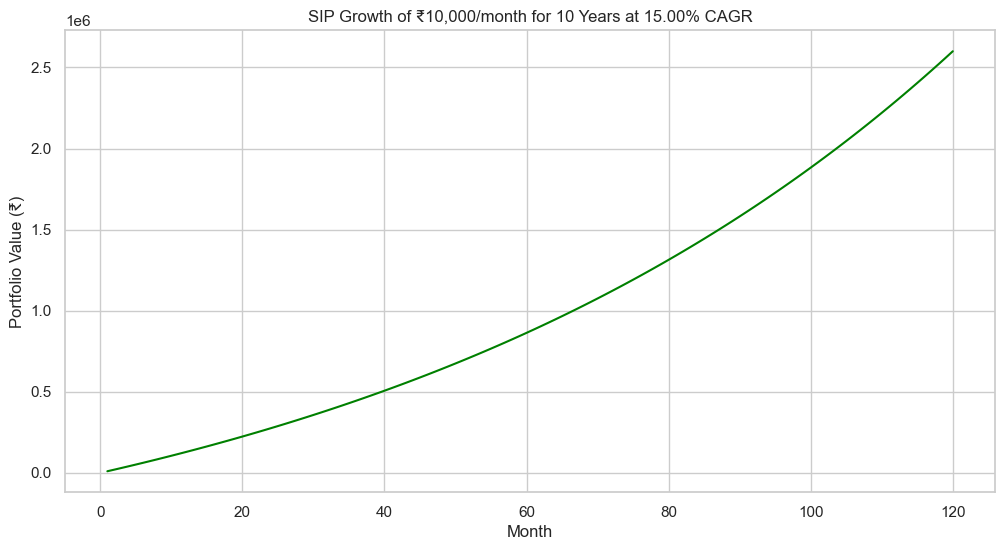

In [10]:
import matplotlib.pyplot as plt

# Parameters
monthly_investment = 10000  # ₹10,000 per month
cagr = 0.15  # 15% CAGR
years = 10
months = years * 12

# Effective monthly rate (approximated)
monthly_rate = (1 + cagr) ** (1/12) - 1

# Simulate SIP growth
values = []
total = 0
for i in range(1, months + 1):
    total = total * (1 + monthly_rate) + monthly_investment
    values.append(total)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(1, months + 1), values, color='green')
plt.title(f'SIP Growth of ₹{monthly_investment:,}/month for {years} Years at {cagr*100:.2f}% CAGR')
plt.xlabel("Month")
plt.ylabel("Portfolio Value (₹)")
plt.grid(True)
plt.show()